# Impacto Humano y Daño de Inundaciones (Flood)

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
from geopy.geocoders import Nominatim

## Cargar base de datos

02desastres_paralimpiar.csv

In [3]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', delimiter=';', encoding='utf-8')
df.head(10)

Dis No  Year   Seq Disaster Subgroup        Disaster Type  \
0  1900-9002-CPV  1900  9002    Climatological              Drought   
1  1900-9001-IND  1900  9001    Climatological              Drought   
2  1902-0012-GTM  1902    12       Geophysical           Earthquake   
3  1902-0003-GTM  1902     3       Geophysical    Volcanic activity   
4  1902-0010-GTM  1902    10       Geophysical    Volcanic activity   
5  1903-0006-CAN  1903     6       Geophysical  Mass movement (dry)   
6  1903-0012-COM  1903    12       Geophysical    Volcanic activity   
7  1904-0003-BGD  1904     3    Meteorological                Storm   
8  1905-0005-CAN  1905     5       Geophysical  Mass movement (dry)   
9  1905-0003-IND  1905     3       Geophysical           Earthquake   

   Disaster Subtype        Country  ISO            Region Continent  ...  \
0           Drought     Cabo Verde  CPV    Western Africa    Africa  ...   
1           Drought          India  IND     Southern Asia      Asia  ...   
2   Ground movement      Guatemala  GTM   Central America  Americas  ...   
3          Ash fall      Guatemala  GTM   Central America  Americas  ...   
4          Ash fall      Guatemala  GTM   Central America  Americas  ...   
5          Rockfall         Canada  CAN  Northern America  Americas  ...   
6          Ash fall  Comoros (the)  COM    Eastern Africa    Africa  ...   
7  Tropical cyclone     Bangladesh  BGD     Southern Asia      Asia  ...   
8          Rockfall         Canada  CAN  Northern America  Americas  ...   
9   Ground movement          India  IND     Southern Asia      Asia  ...   

  Longitude Start Year Start Month  Start Day End Year End Month End Day  \
0       NaN       1900         NaN        NaN     1900       NaN     NaN   
1       NaN       1900         NaN        NaN     1900       NaN     NaN   
2       -91       1902         4.0       18.0     1902       4.0    18.0   
3       NaN       1902         4.0        8.0     1902       4.0     8.0   
4       NaN       1902        10.0       24.0     1902      10.0    24.0   
5       NaN       1903         4.0       29.0     1903       4.0    29.0   
6       NaN       1903         NaN        NaN     1903       NaN     NaN   
7       NaN       1904        11.0        NaN     1904      11.0     NaN   
8       NaN       1905         8.0       13.0     1905       8.0    13.0   
9     76.16       1905         4.0        4.0     1905       4.0     4.0   

   Total Deaths  Total Affected  Total Damages Adj  
0       11000.0             NaN                NaN  
1     1250000.0             NaN                NaN  
2        2000.0             NaN           843726.0  
3        1000.0             NaN                NaN  
4        6000.0             NaN                NaN  
5          76.0            23.0                NaN  
6          17.0             NaN                NaN  
7           NaN             NaN                NaN  
8          18.0            18.0                NaN  
9       20000.0             NaN           812477.0  

[10 rows x 26 columns]

## EDA Inicial Básico

In [4]:
df.shape

(16636, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Dis Mag Value      5064 non-null   float64
 14  Dis Mag Scale      15416 non-null  object 
 15  Latitude           2775 non-null   object 
 16  Longitude          277

## Filtro Disaster Type == Flood

In [6]:
filter = df['Disaster Type'] == 'Flood'
df_flood = df[filter]

In [7]:
df_flood.head(2)

Dis No  Year  Seq Disaster Subgroup Disaster Type Disaster Subtype  \
12  1906-0023-BEL  1906   23      Hydrological         Flood              NaN   
13  1906-0024-BEL  1906   24      Hydrological         Flood              NaN   

    Country  ISO          Region Continent  ... Longitude Start Year  \
12  Belgium  BEL  Western Europe    Europe  ...       NaN       1906   
13  Belgium  BEL  Western Europe    Europe  ...       NaN       1906   

   Start Month  Start Day End Year End Month End Day  Total Deaths  \
12         5.0       14.0     1906       5.0    14.0           6.0   
13         4.0        NaN     1906       4.0     NaN           NaN   

    Total Affected  Total Damages Adj  
12             NaN                NaN  
13             NaN                NaN  

[2 rows x 26 columns]

In [8]:
df_flood.shape

(5808, 26)

In [9]:
df_flood['Disaster Type'].dtype

dtype('O')

# Limpieza de coordenadas

## Función para limpiar coordenadas filtrado para df_flood

In [10]:
# Convertir 'Latitude' y 'Longitude' a string
df['Latitude'] = df['Latitude'].astype(str)
df['Longitude'] = df['Longitude'].astype(str)

# Limpiar las coordenadas de latitud y longitud
df['Latitude'] = df['Latitude'].apply(lambda x: re.sub('[^\d.-]', '', x))
df['Longitude'] = df['Longitude'].apply(lambda x: re.sub('[^\d.-]', '', x))

# Quitar puntos finales
df['Latitude'] = df['Latitude'].str.rstrip('.')
df['Longitude'] = df['Longitude'].str.rstrip('.')

# Añadir valores anómalos de latitud y longitud a listas
anomalous_lat = []
anomalous_lon = []

def convert_coordinates(x, convert_nan=True):
    if not x:
        return np.nan

    # Remover caracteres 'N' y 'E'
    x = x.replace(' N', '').replace(' E', '')
    
    # Remover puntos extras en decimales
    x = re.sub('^(\d+\.\d{2})\..*', r'\1', x)

    # Conversión a negativo para S y W
    try:
        value = float(x)
        if x[-1] == 'S' or x[-1] == 'W':
            return -value
        else:
            return value
    except ValueError:
        return np.nan

# Convertir a float
df['Latitude'] = df['Latitude'].apply(convert_coordinates)
df['Longitude'] = df['Longitude'].apply(convert_coordinates)

# Redondear decimales
df['Latitude'] = df['Latitude'].round(2)
df['Longitude'] = df['Longitude'].round(2)

# Identificación de valores anómalos fuera de rango de grados de sistema de coordenadas
for index, row in df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']

    if latitude < -90 or latitude > 90:
        anomalous_lat.append(latitude)

    if longitude < -180 or longitude > 180:
        anomalous_lon.append(longitude)

print("Valores anómalos de Latitude:", anomalous_lat)
print("Valores anómalos de Longitude:", anomalous_lon)


Valores anómalos de Latitude: [357.0, 411.44, 564.78, -865.05, 270.63, 350.75, 388.5, 151.82, 940.04, 193.8, -295.02, -405.21, 125.95, 289.08, 213.52, 334.55, 420.68, 194.43, 301.14, 342.7, 370.53, -104.9, 465.99, -528.26, 398.68, 191.36, 236.39, -189.54, 282.42, 227.7, 369.29, -344.81, 445.99, 304.56, 359.16, 258.63, 229.04, 491.36, 532.73, 146.06, -617.95, 448.01, -133.89, 439.96, 431.6, 165.92, 822.39, -140.1, 205.95, 240.59, -183.1, 246.17, 163.19, 396.15, 166.08, 759.78, 420.41, 183.12, -248.01, -202.3, -156.18, 358.44, 150.1, 271.82, 287.4, -158.38, -203.46, 98.8, 500.04, 443.29, 136.88, 216.96, 439.96, 303.63, 289.64, 139.19, 382.14, 388.28, 375.6, -164.64, -414.04, 271.89, -383.65, 440.62, 359.05, 250.0, 233.83, 303.4, 233.58, 368.56, 382.08, 402.89, -881.66, -223.62, 270.33, 101.74, 420.68, -315.73, -255.69, 570.69, 365.24, 364.94, -121.14, -351.09, 282.3, -115.04, -697.8, -441.03, 282.3, 278.09, 374.59, 394.74, 738.0, 414.57, 666.58, 730.95, 271.5, 325.83, 366.41, 484.05, -25

## Tests de verificación de limpieza de coordenadas

In [11]:
print(df_flood['Latitude'])
print(df_flood['Longitude'])

12       NaN
13       NaN
34       NaN
39       NaN
43       NaN
        ... 
16620    NaN
16628    NaN
16629    NaN
16631    NaN
16634    NaN
Name: Latitude, Length: 5808, dtype: object
12       NaN
13       NaN
34       NaN
39       NaN
43       NaN
        ... 
16620    NaN
16628    NaN
16629    NaN
16631    NaN
16634    NaN
Name: Longitude, Length: 5808, dtype: object


In [12]:
print(df_flood['Latitude'].dtype)
print(df_flood['Longitude'].dtype)

object
object


In [13]:
# Examinar filas específicas para verificar si el proceso de limpieza ha manejado los valores anómalos correctamente.
print(df_flood.loc[12000, 'Latitude'])
print(df_flood.loc[12000, 'Longitude'])

-7.379
110.24


In [14]:
# Valores nulos de Longitude y Latitude
df_flood[['Longitude', 'Latitude']].isnull().sum()

Longitude    4810
Latitude     4810
dtype: int64

## Valores Anómalos de Latitud y Longitud

In [15]:
len(anomalous_lat)

158

In [16]:
len(anomalous_lon)

31

#### Índices Anómalos de Latitud y longitud

In [17]:
anomalous_lat_idx = []
for index, lat in enumerate(anomalous_lat):
    if lat < -90 or lat > 90:
        anomalous_lat_idx.append(index)

print("Índices Anómalos de Latitud:", anomalous_lat_idx)

Índices Anómalos de Latitud: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]


In [18]:
anomalous_lon_idx = []
for index, lon in enumerate(anomalous_lon):
    if lat < -90 or lat > 90:
        anomalous_lon_idx.append(index)

print("Índices Anómalos de Longitud:", anomalous_lon_idx)

Índices Anómalos de Longitud: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


## Outliers de Latitude y Longitude

<Axes: >

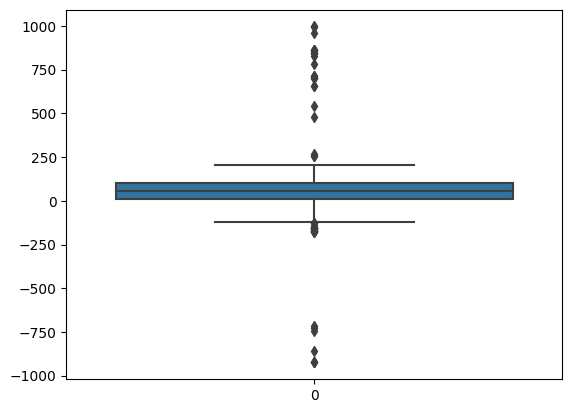

In [19]:
sns.boxplot(df['Longitude'])

<Axes: >

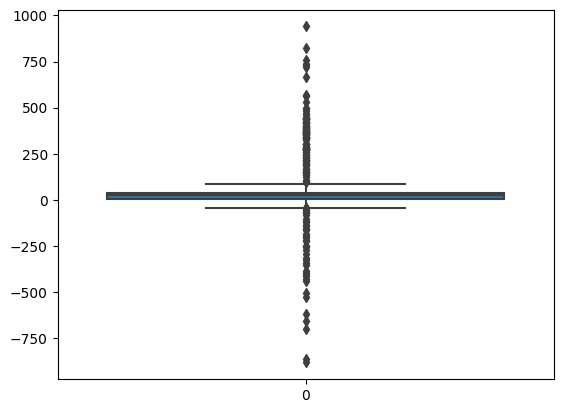

In [20]:
sns.boxplot(df['Latitude'])

## Valores faltantes

In [21]:
df_flood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5808 entries, 12 to 16634
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             5808 non-null   object 
 1   Year               5808 non-null   int64  
 2   Seq                5808 non-null   int64  
 3   Disaster Subgroup  5808 non-null   object 
 4   Disaster Type      5808 non-null   object 
 5   Disaster Subtype   3564 non-null   object 
 6   Country            5808 non-null   object 
 7   ISO                5808 non-null   object 
 8   Region             5808 non-null   object 
 9   Continent          5808 non-null   object 
 10  Location           5512 non-null   object 
 11  Origin             3446 non-null   object 
 12  Associated Dis     1383 non-null   object 
 13  Dis Mag Value      1777 non-null   float64
 14  Dis Mag Scale      5808 non-null   object 
 15  Latitude           998 non-null    object 
 16  Longitude          998

In [22]:
df_flood.isnull().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype     2244
Country                 0
ISO                     0
Region                  0
Continent               0
Location              296
Origin               2362
Associated Dis       4425
Dis Mag Value        4031
Dis Mag Scale           0
Latitude             4810
Longitude            4810
Start Year              0
Start Month            48
Start Day             946
End Year                0
End Month              47
End Day               943
Total Deaths         1580
Total Affected        917
Total Damages Adj    3909
dtype: int64

# Afectados por Inundaciones

### Muertos por Inundaciones:

7.004.082

Siete millones, cuatro mil, ochenta y dos.

In [23]:
df_flood_deaths = df_flood['Total Deaths'].sum()

### Afectados por Inundaciones:
3.968.190.458

Tres billones, novescientos sesenta y ocho millones, ciento noventa mil cuatrocientos cincuenta y ocho.

o

Tres mil novecientos sesenta y ocho millones, ciento noventa mil, cuatrocientos cincuenta y ocho.

In [24]:
df_flood_affected = df_flood['Total Affected'].sum()

## Análisis geográfico de muertos y afectados

### Muertos y afectados por continente

In [25]:
df_flood_continent_counts = df_flood['Continent'].value_counts()
df_flood_continent_counts

Asia        2407
Americas    1353
Africa      1213
Europe       678
Oceania      157
Name: Continent, dtype: int64

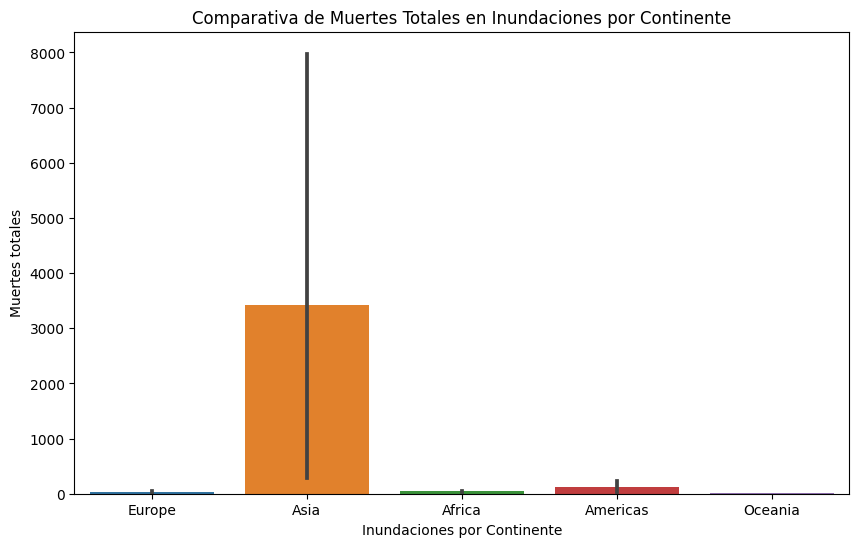

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Continent', y='Total Deaths')
plt.title('Comparativa de Muertes Totales en Inundaciones por Continente')
plt.xlabel('Inundaciones por Continente')
plt.ylabel('Muertes totales')
plt.show()

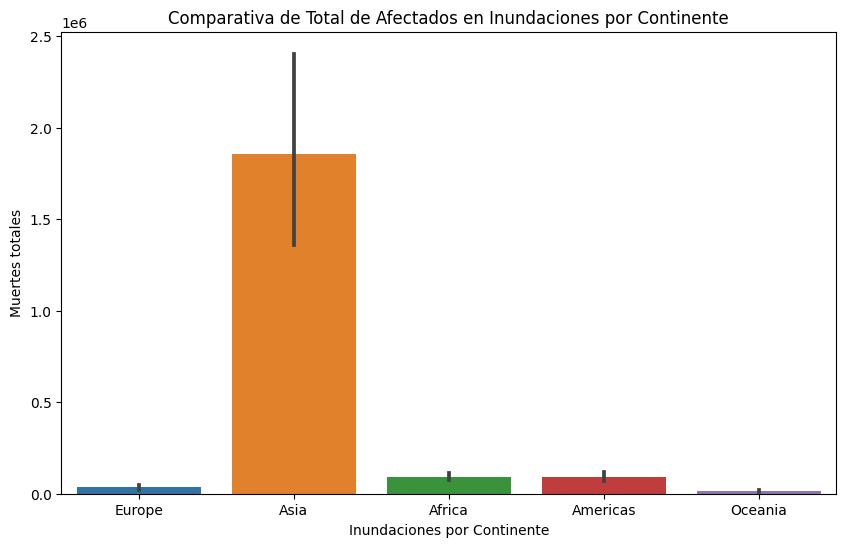

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Continent', y='Total Affected')
plt.title('Comparativa de Total de Afectados en Inundaciones por Continente')
plt.xlabel('Inundaciones por Continente')
plt.ylabel('Muertes totales')
plt.show()

Asia es el continente con más muertos y afectados respecto a otros.

### Muertos y afectados por región

In [28]:
df_flood_region_counts = df_flood['Region'].value_counts()
df_flood_region_counts

Southern Asia                869
South-Eastern Asia           791
South America                668
Eastern Asia                 489
Eastern Africa               469
Western Africa               312
Central America              272
Northern America             250
Southern Europe              234
Eastern Europe               234
Western Asia                 204
Northern Africa              182
Caribbean                    163
Middle Africa                162
Western Europe               140
Australia and New Zealand    111
Southern Africa               88
Central Asia                  54
Northern Europe               52
Melanesia                     38
Russian Federation            18
Micronesia                     5
Polynesia                      3
Name: Region, dtype: int64

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


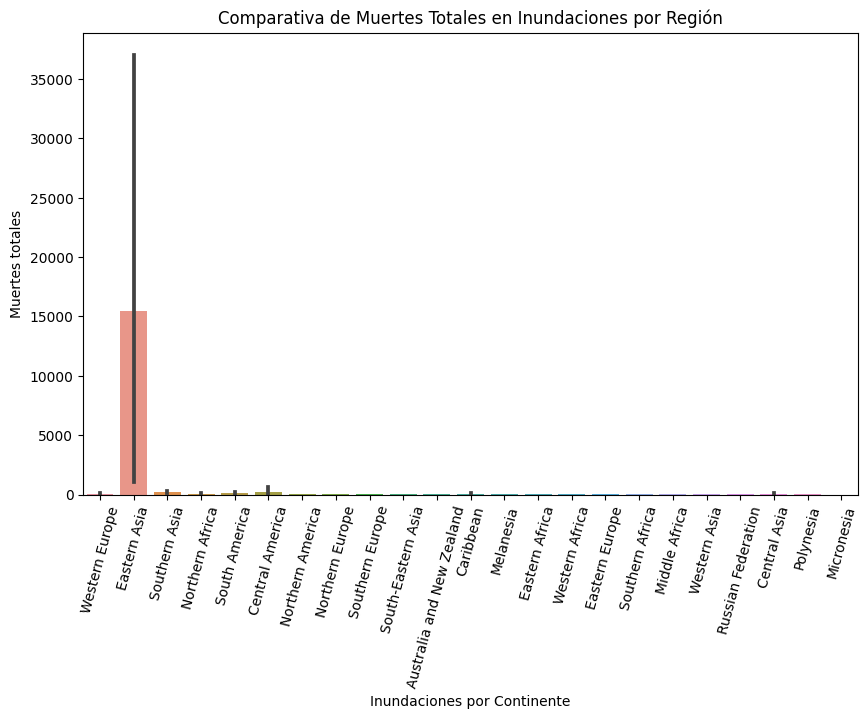

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Region', y='Total Deaths')
plt.title('Comparativa de Muertes Totales en Inundaciones por Región')
plt.xlabel('Inundaciones por Continente')
plt.ylabel('Muertes totales')
plt.xticks(rotation=75)
plt.show()

El Este Asiático supera por creces el número de muertes por inundaciones.

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


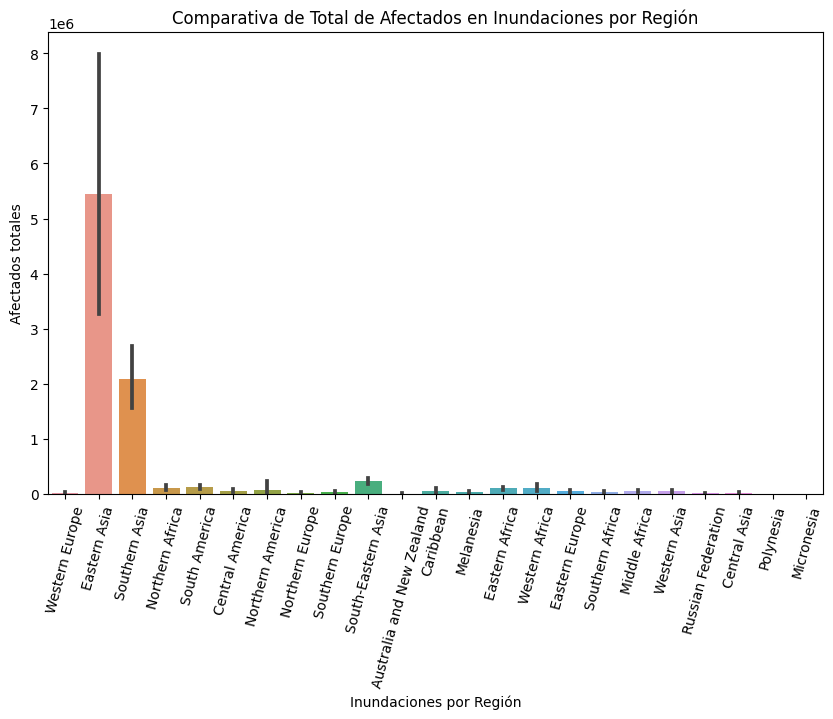

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Region', y='Total Affected')
plt.title('Comparativa de Total de Afectados en Inundaciones por Región')
plt.xlabel('Inundaciones por Región')
plt.ylabel('Afectados totales')
plt.xticks(rotation=75)
plt.show()

El Este y Sur de Asia tienen altos niveles de personas afectadas por inundaciones, seguidos de lejos por el Sudeste Asiático.

### Muertos y afectados por país

In [31]:
df_flood_country_counts = df_flood['Country'].value_counts()
df_flood_country_counts

India                             316
China                             314
Indonesia                         265
United States of America (the)    205
Brazil                            174
                                 ... 
Guadeloupe                          1
Saint Kitts and Nevis               1
Iceland                             1
Turkmenistan                        1
Sao Tome and Principe               1
Name: Country, Length: 190, dtype: int64

#### Total de Muertes en Países Agrupados por Regiones

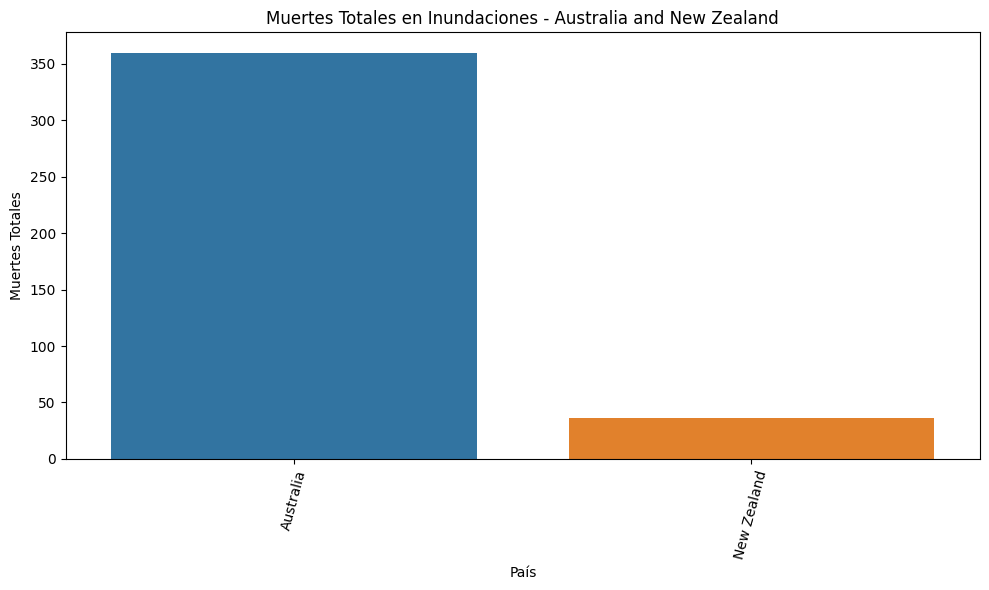

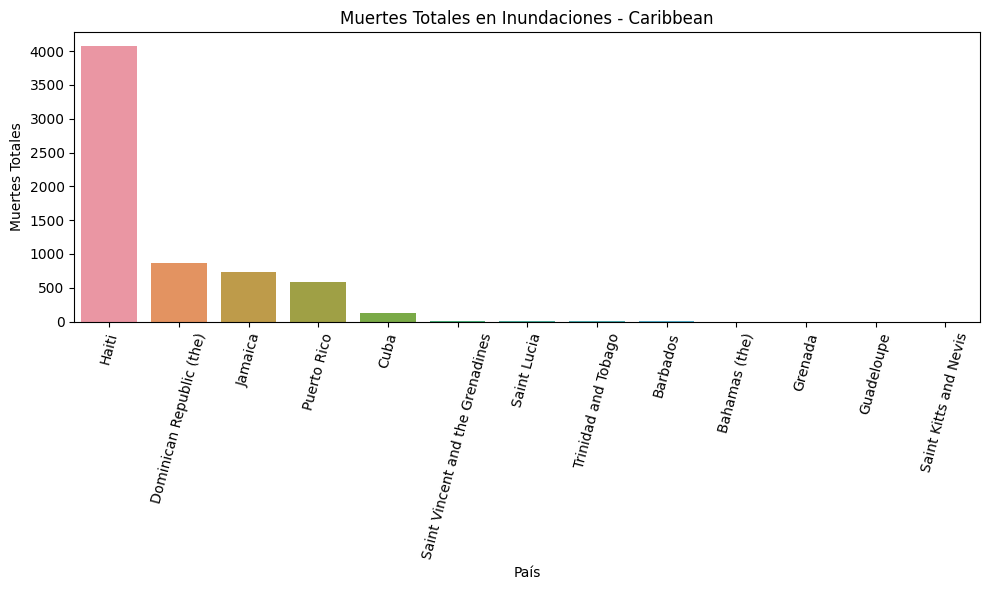

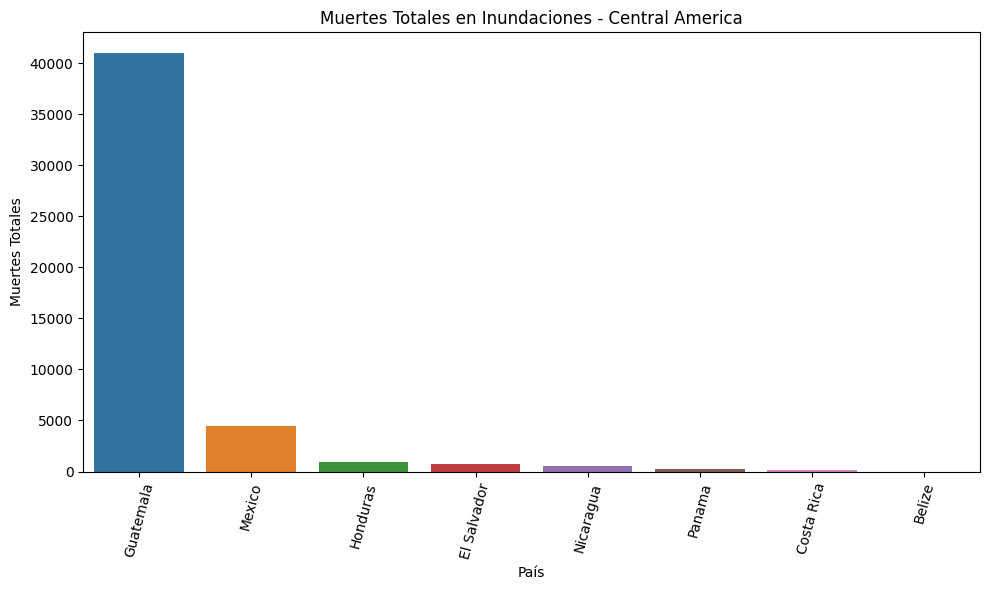

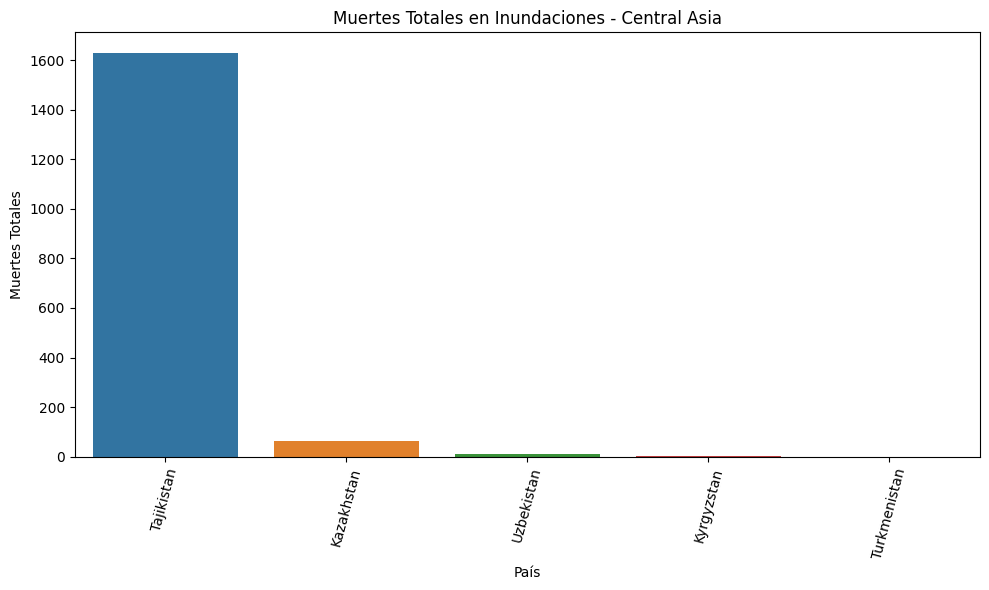

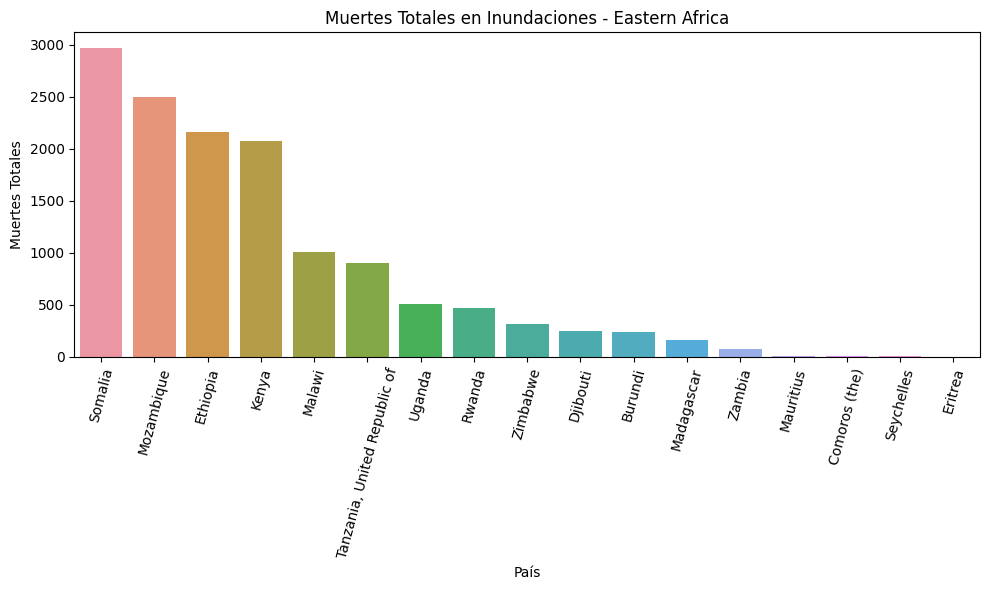

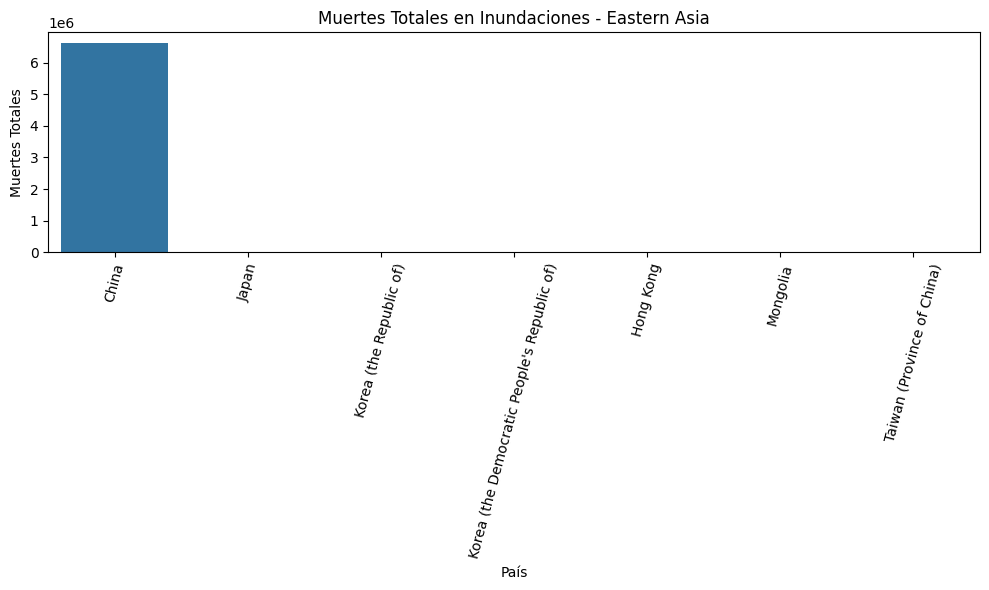

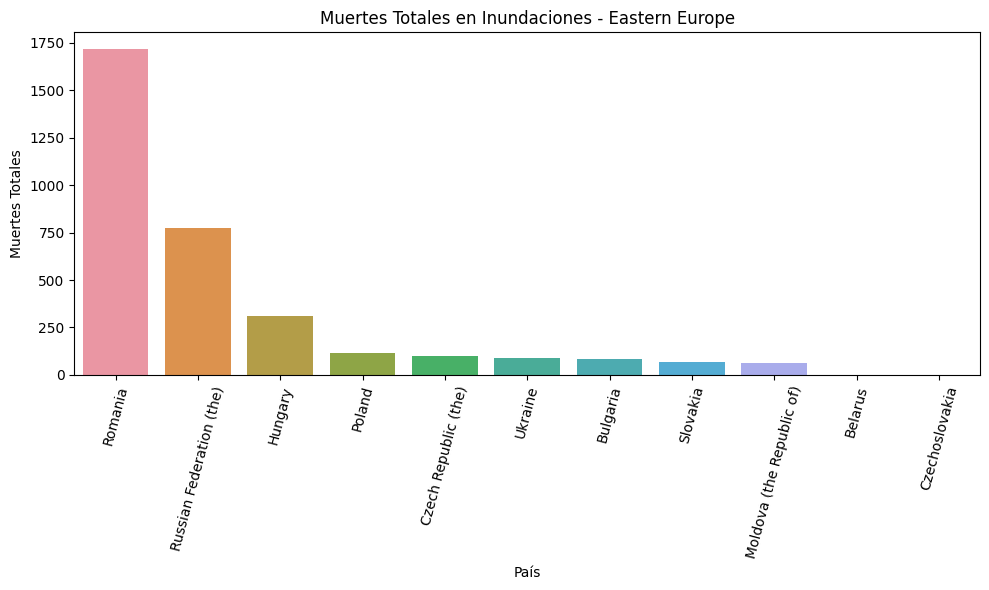

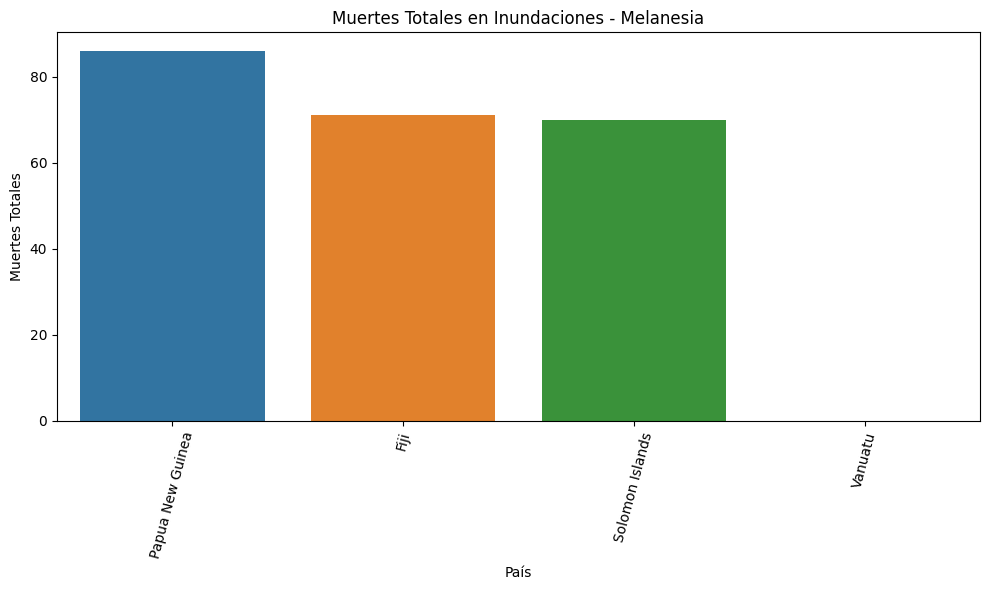

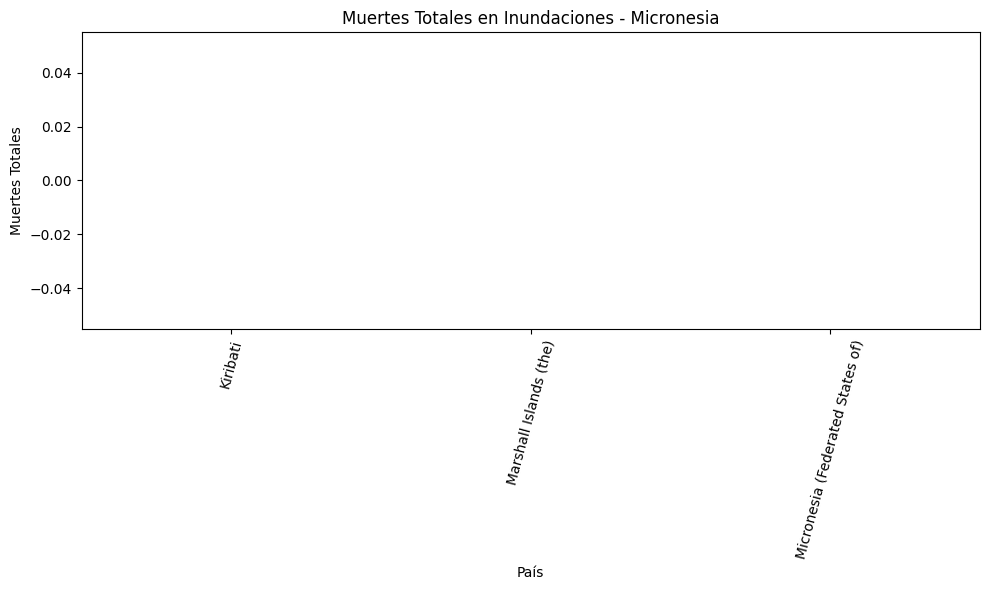

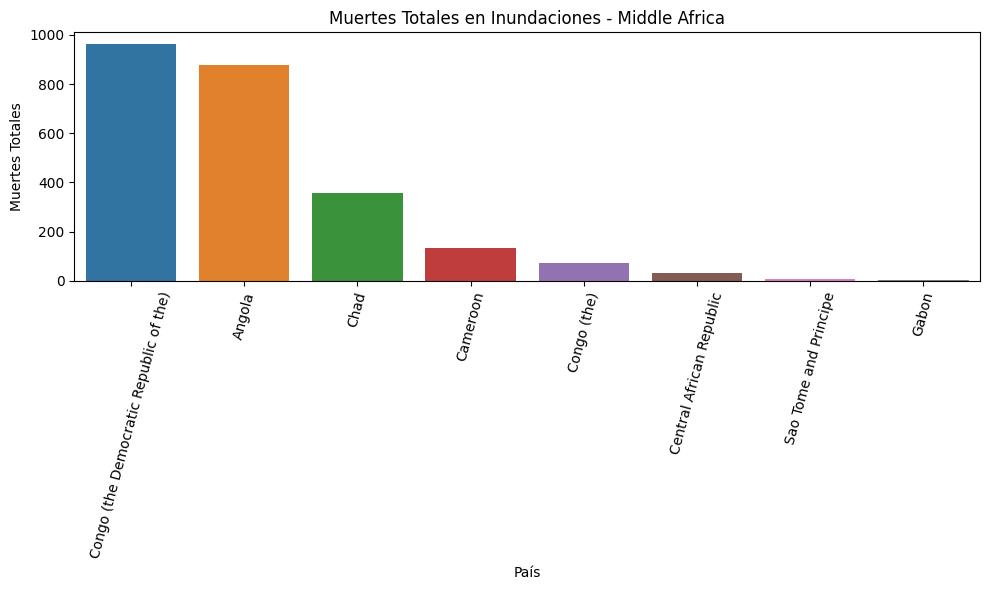

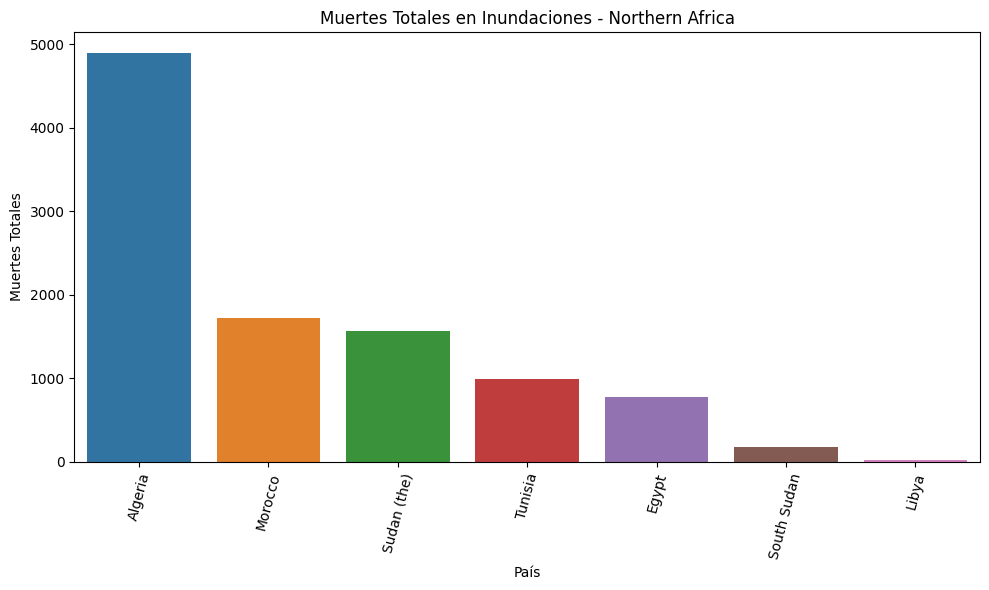

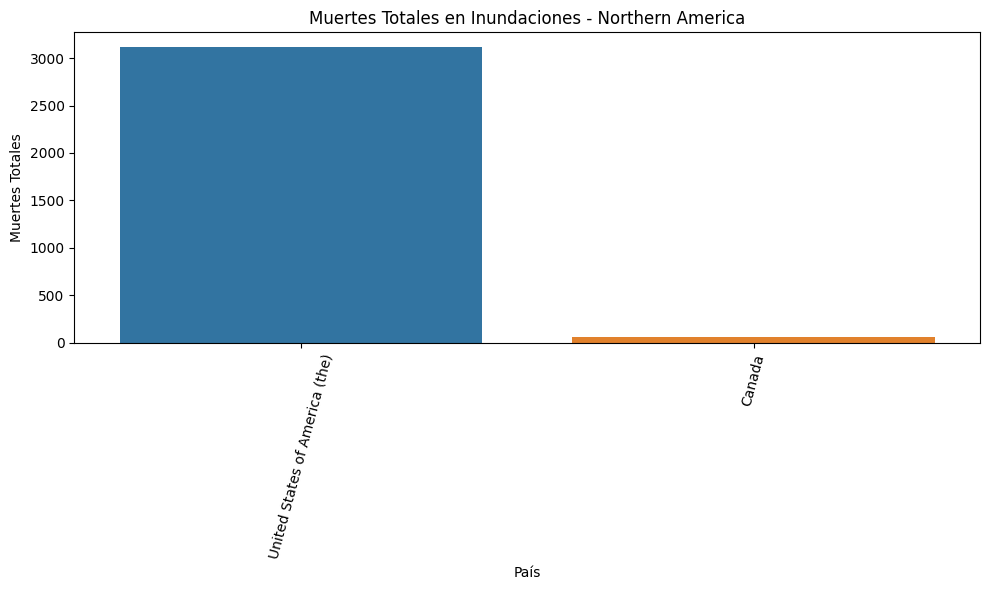

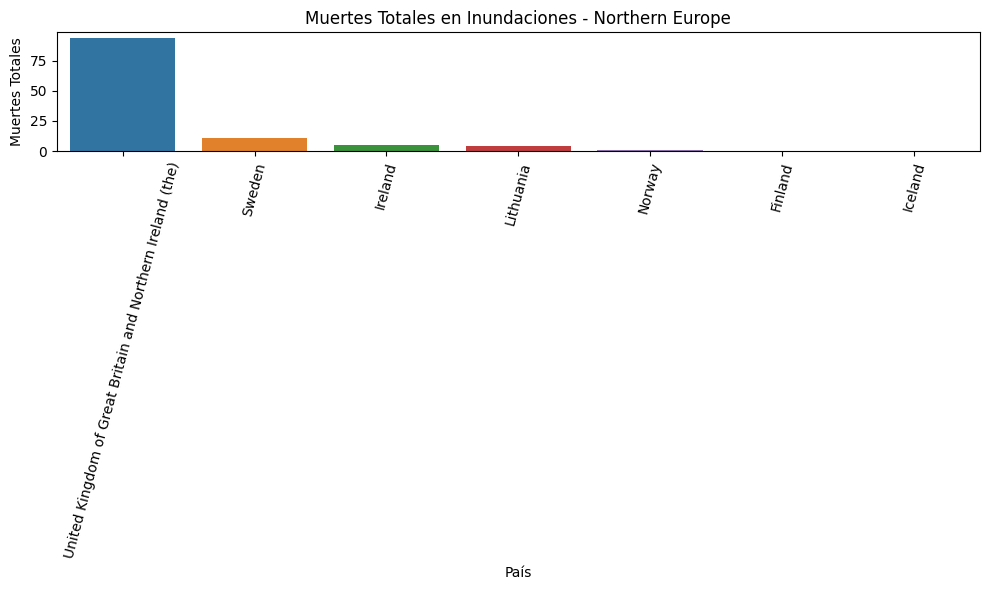

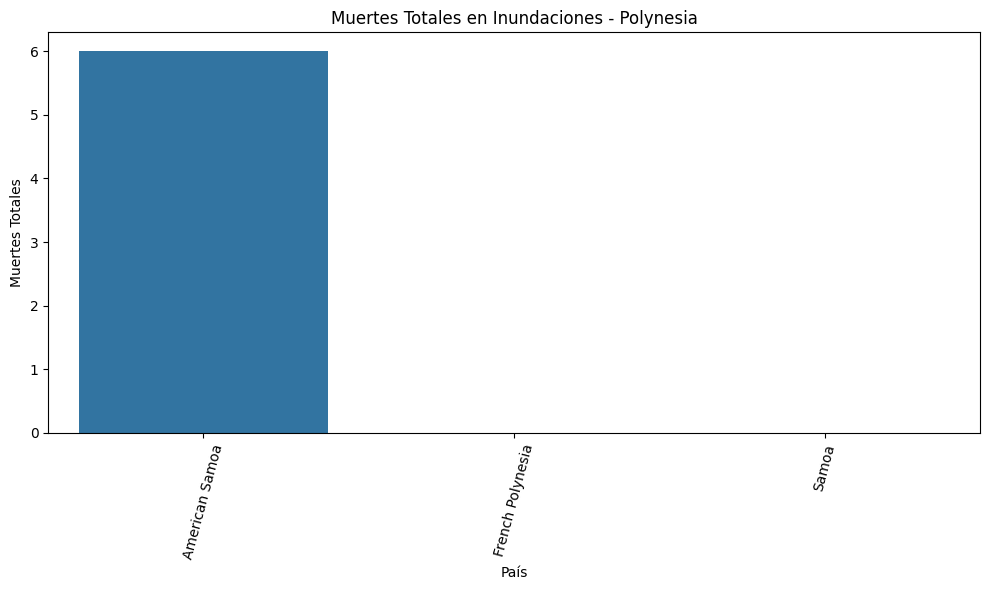

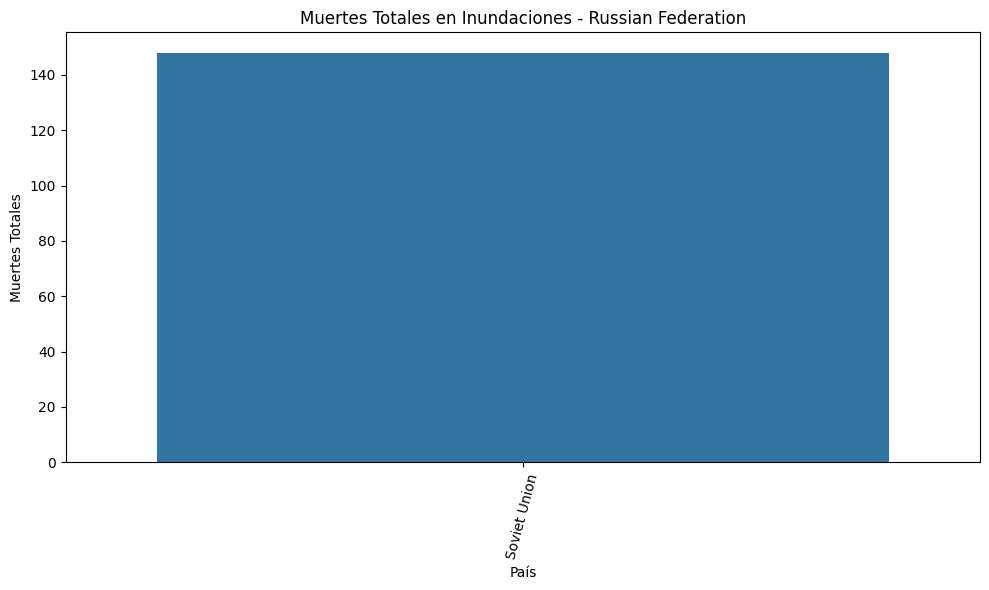

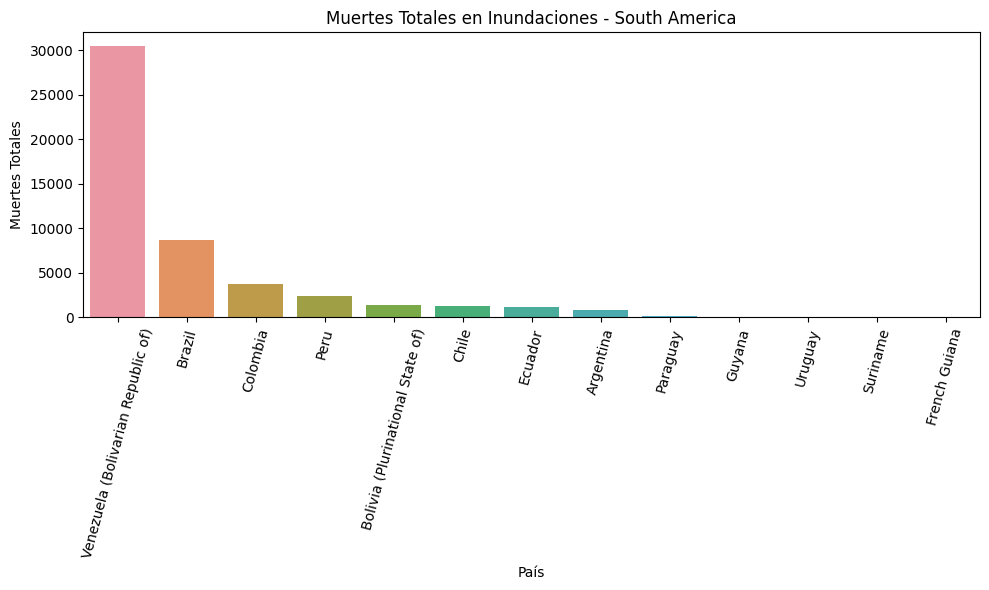

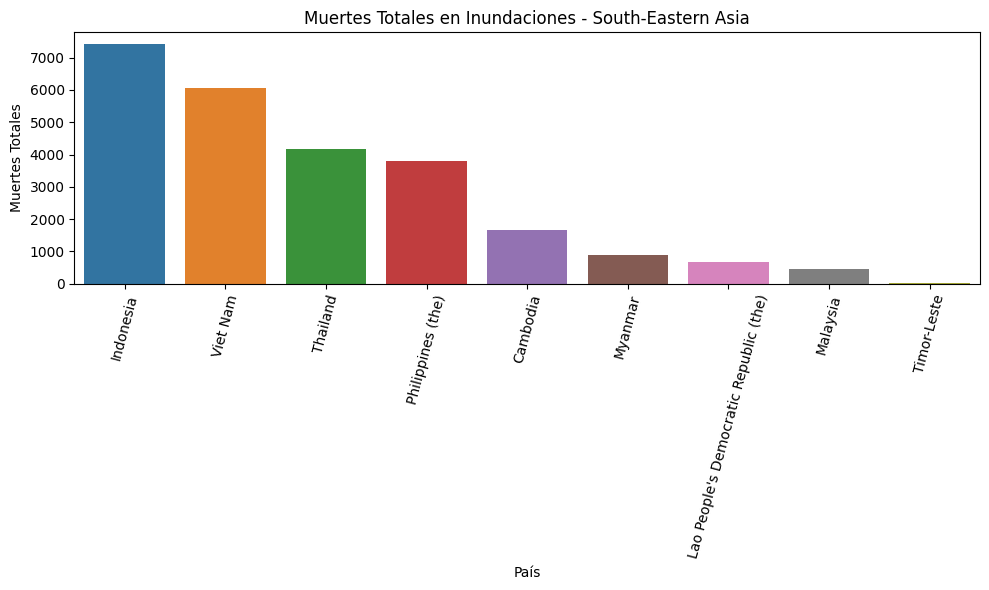

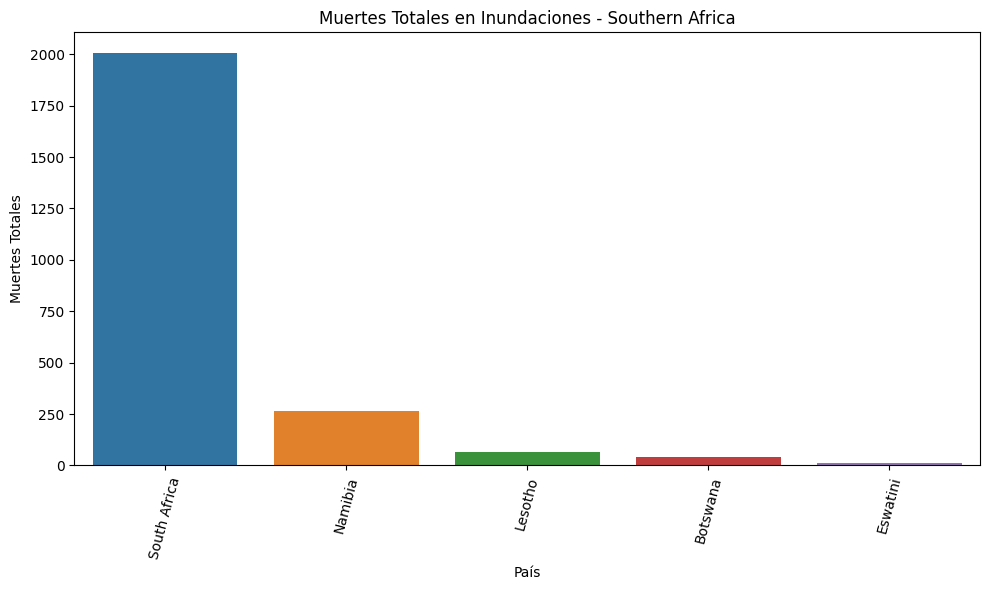

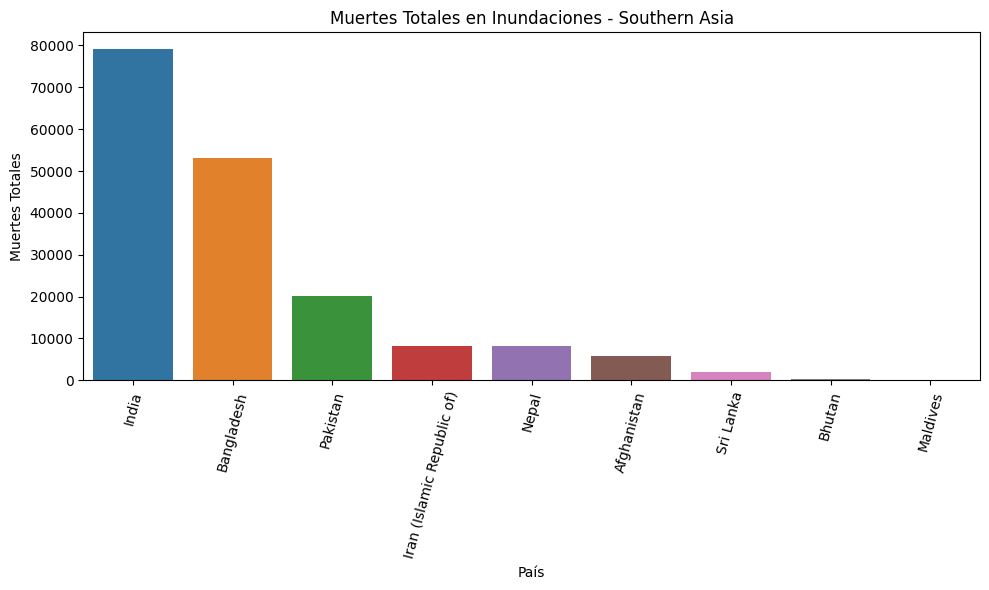

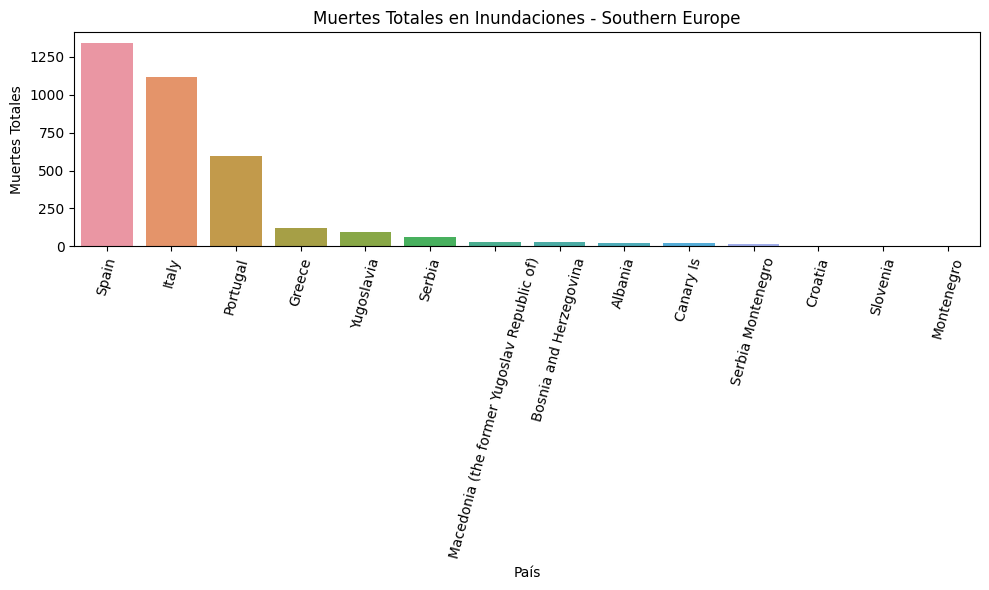

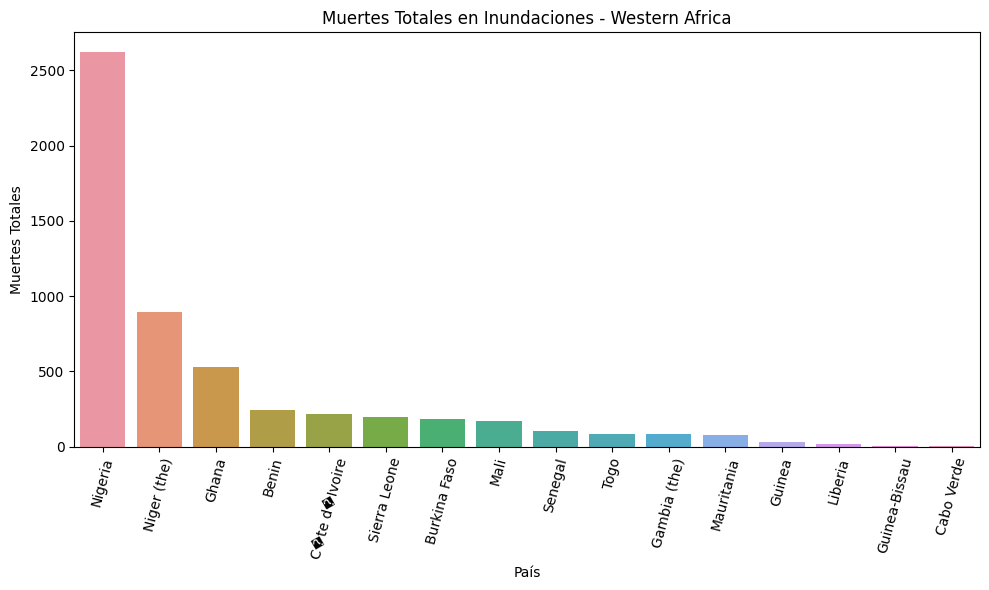

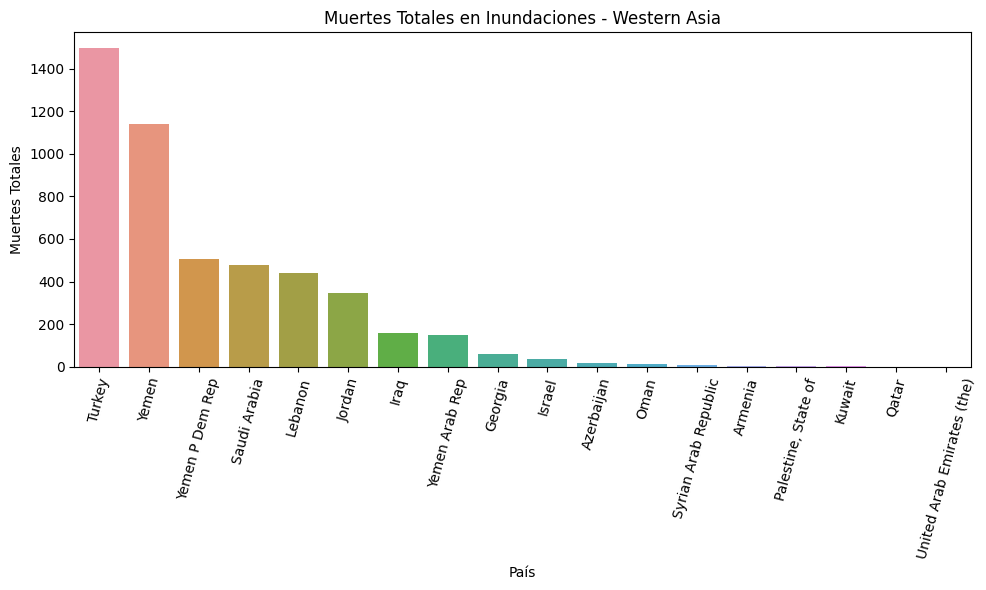

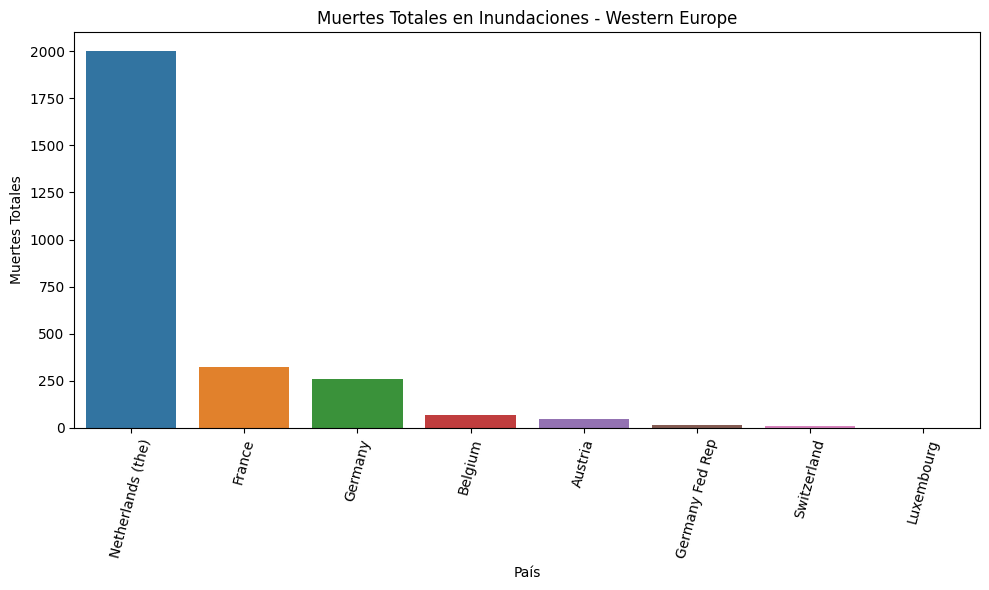

In [32]:
# Agrupar por región y calcular la suma total de muertes por cada país
region_country_deaths = df_flood.groupby(['Region', 'Country'])['Total Deaths'].sum().reset_index()

# Ordenar por Region y Total Deaths
region_country_deaths = region_country_deaths.sort_values(['Region', 'Total Deaths'], ascending=[True, False])

# Unique de regiones
regions = region_country_deaths['Region'].unique()

# Crear barplot separado por cada región
for region in regions:
    plt.figure(figsize=(10, 6))
    region_data = region_country_deaths[region_country_deaths['Region'] == region]
    sns.barplot(data=region_data, x='Country', y='Total Deaths')
    plt.title(f'Muertes Totales en Inundaciones - {region}')
    plt.xlabel('País')
    plt.ylabel('Muertes Totales')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

#### Total de Afectados en Países Agrupados por Regiones

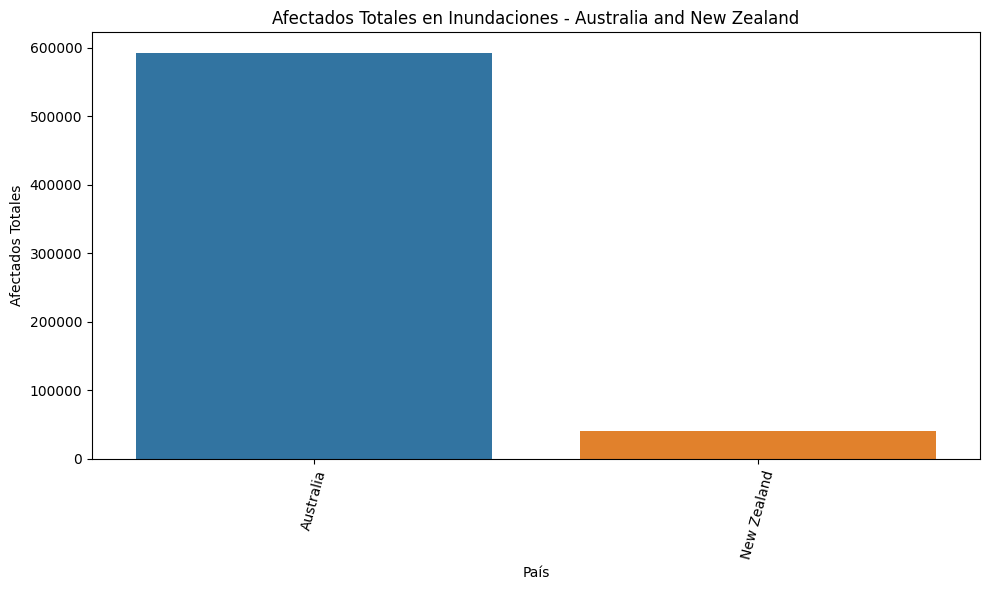

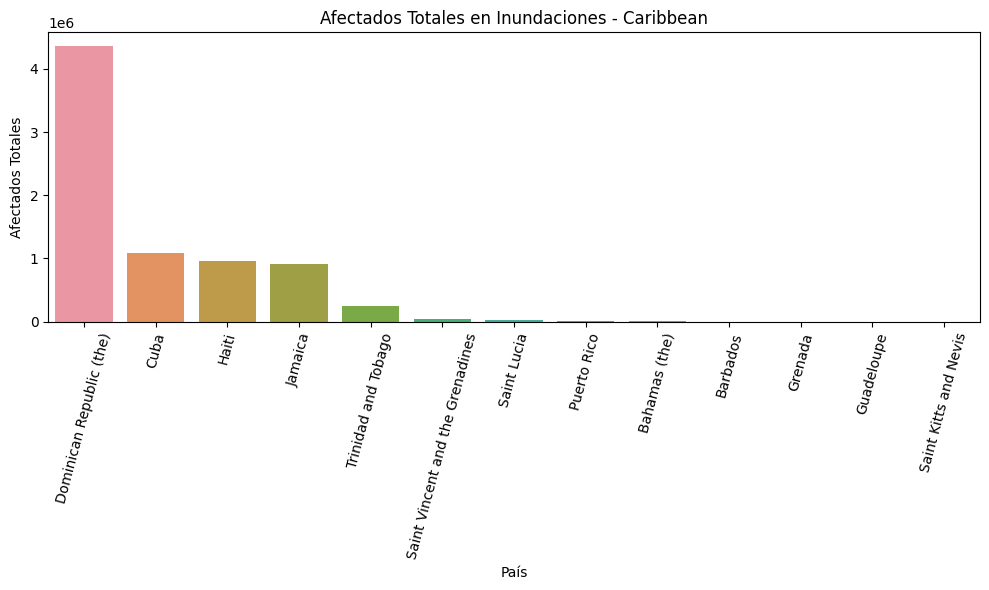

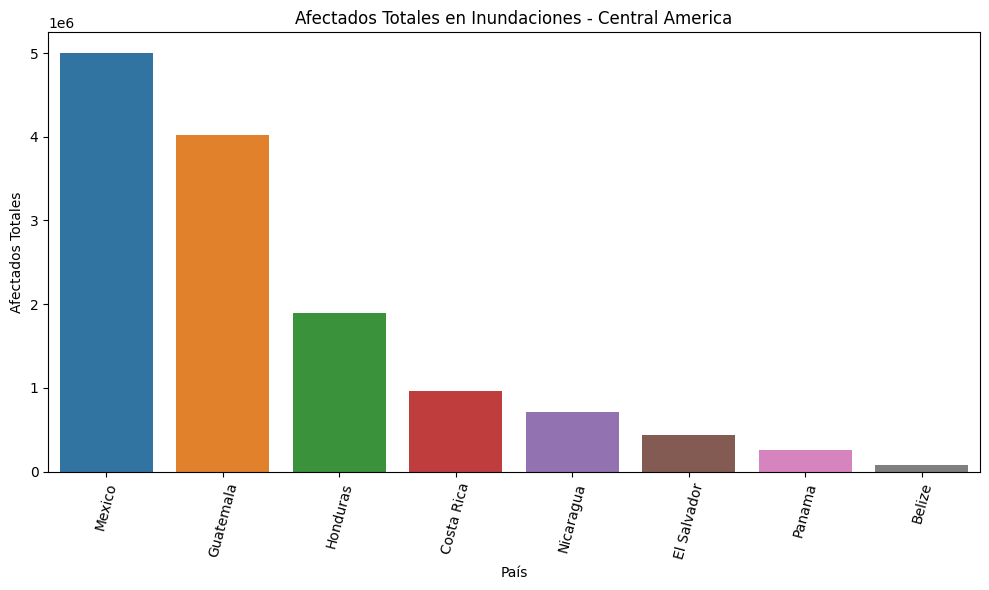

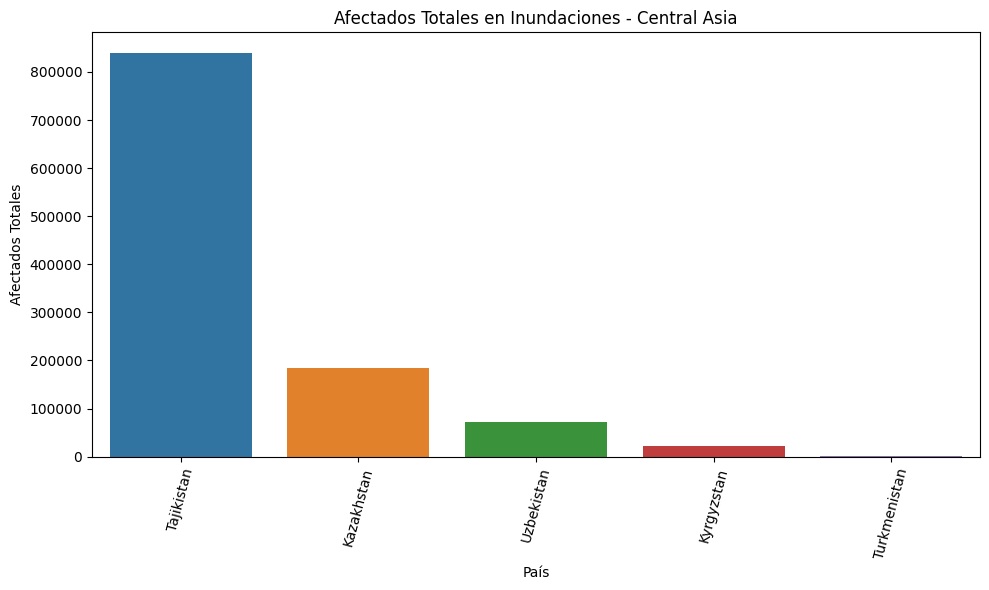

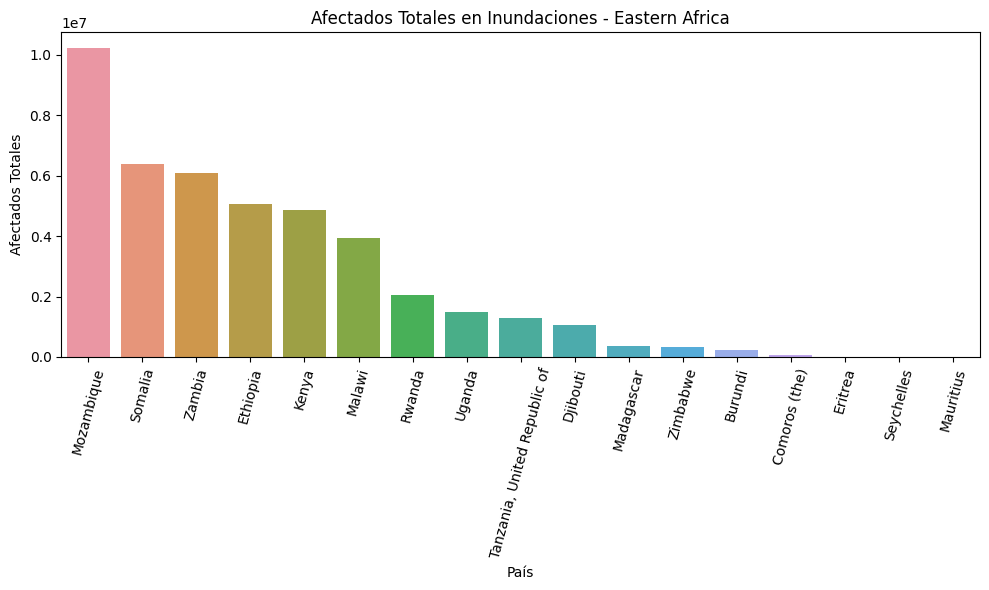

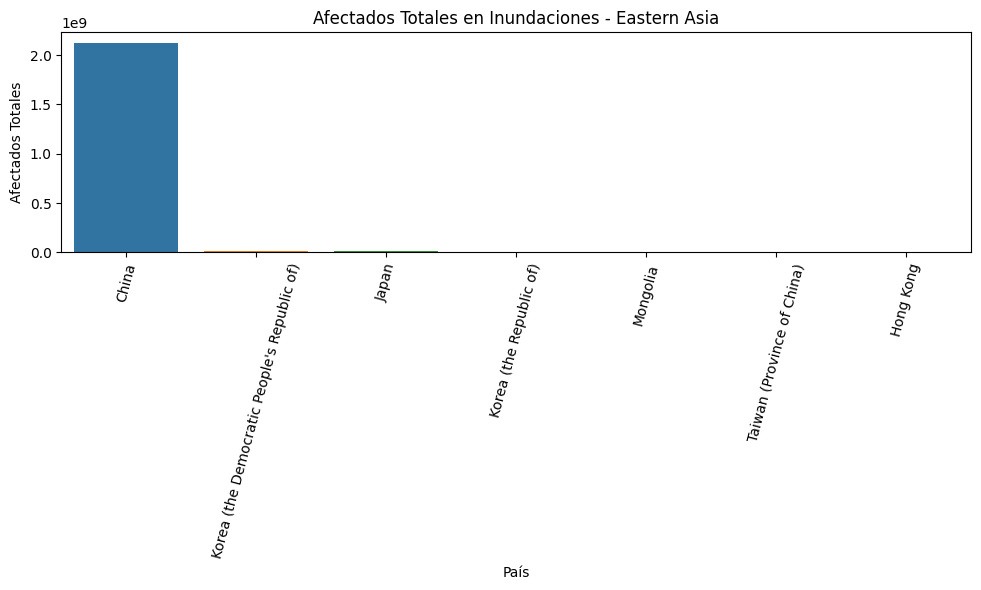

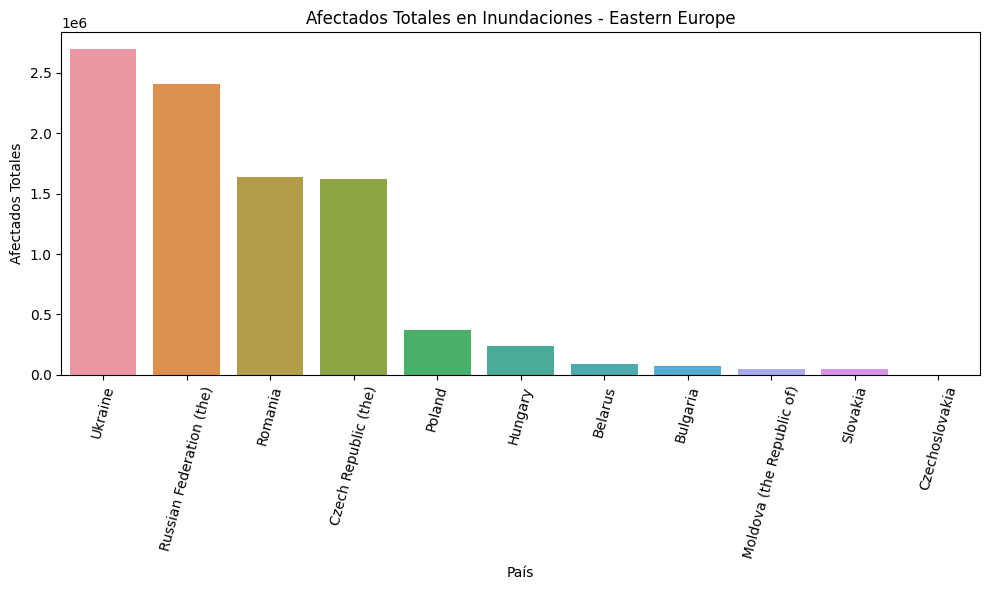

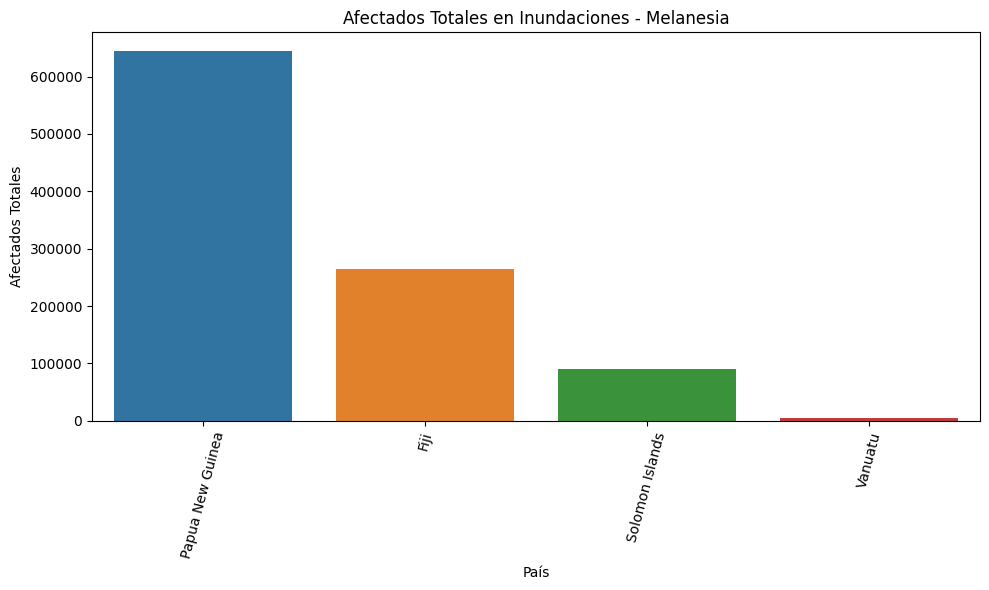

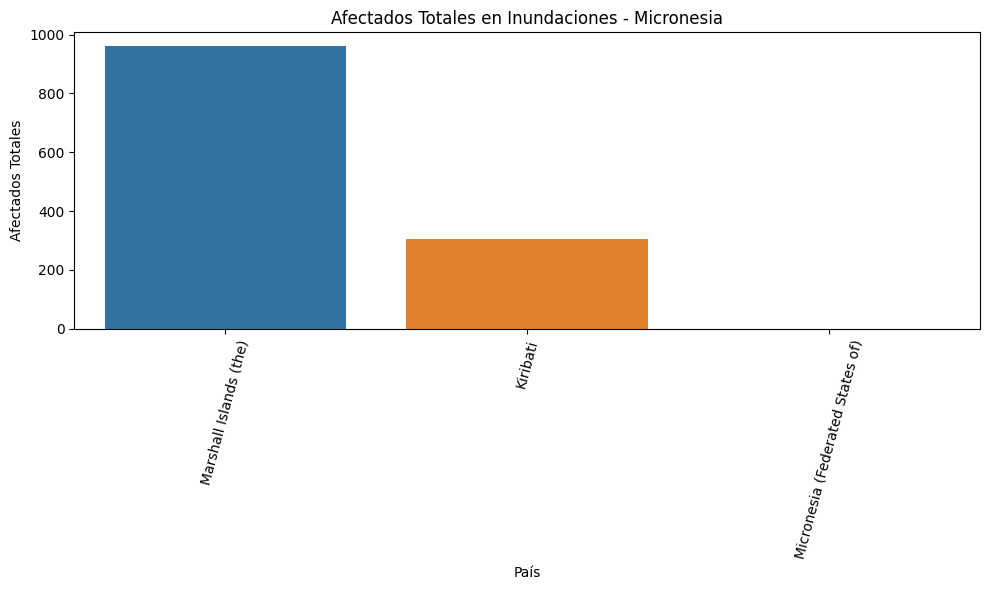

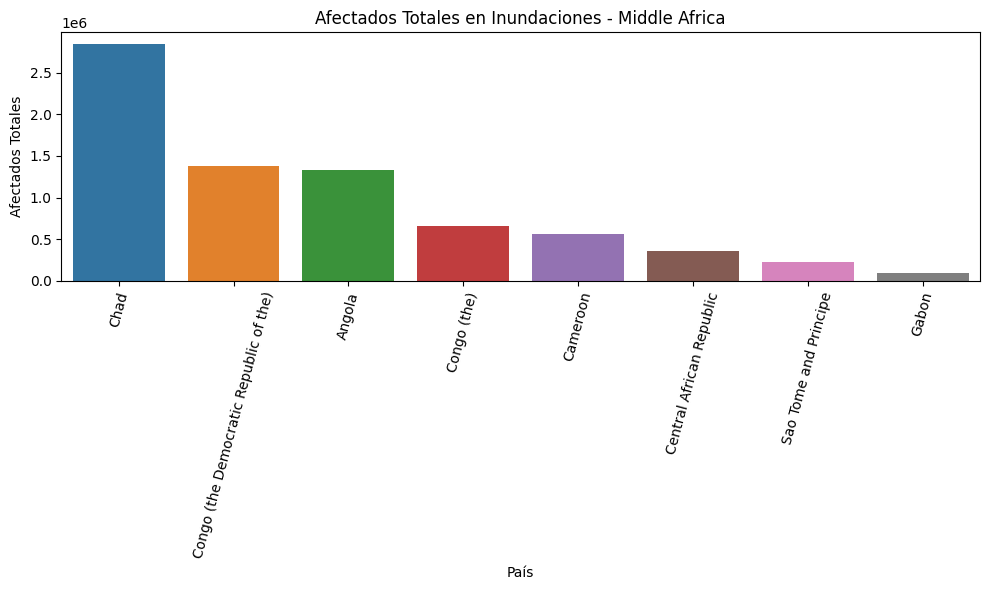

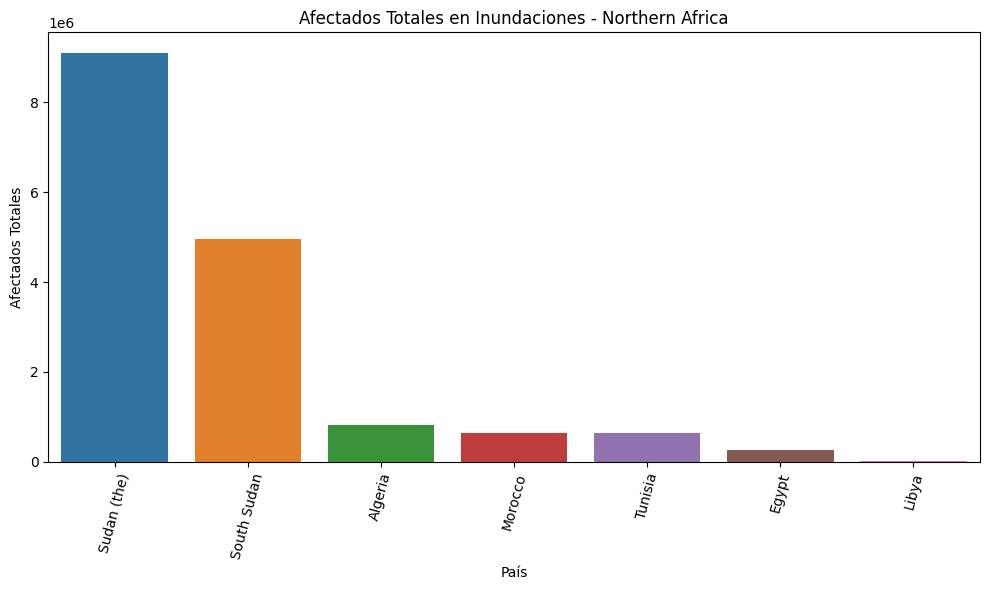

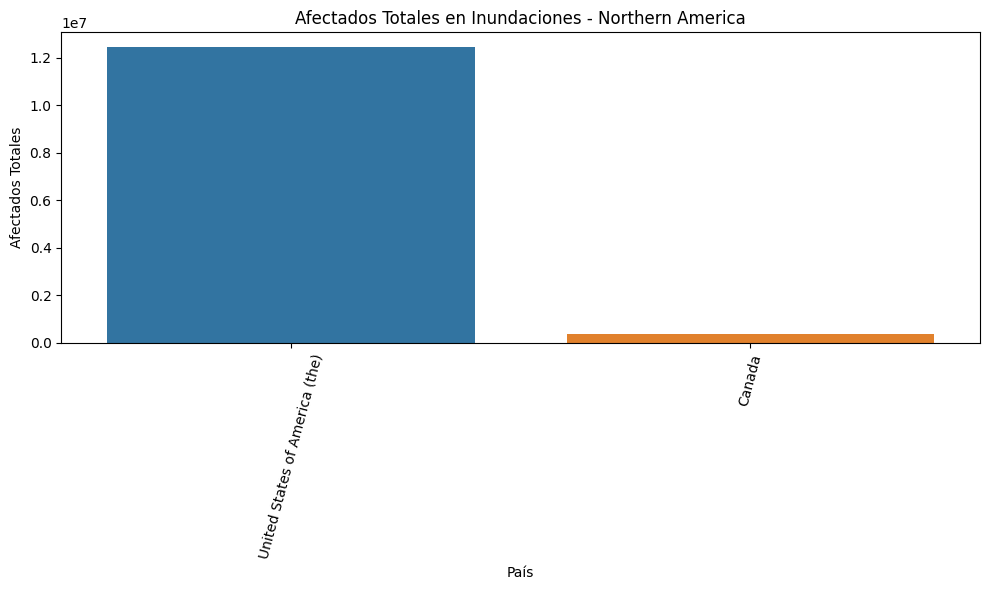

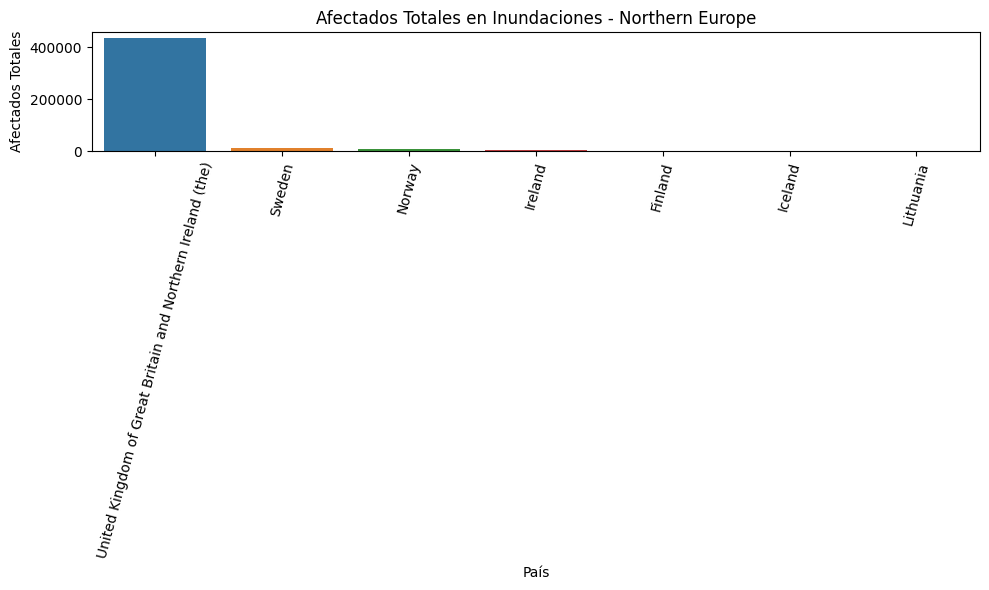

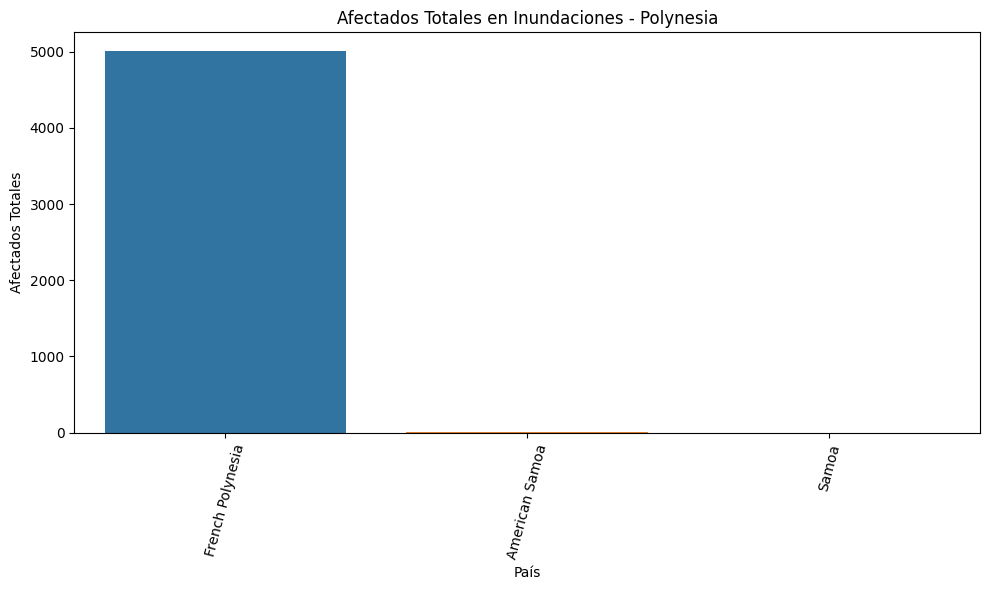

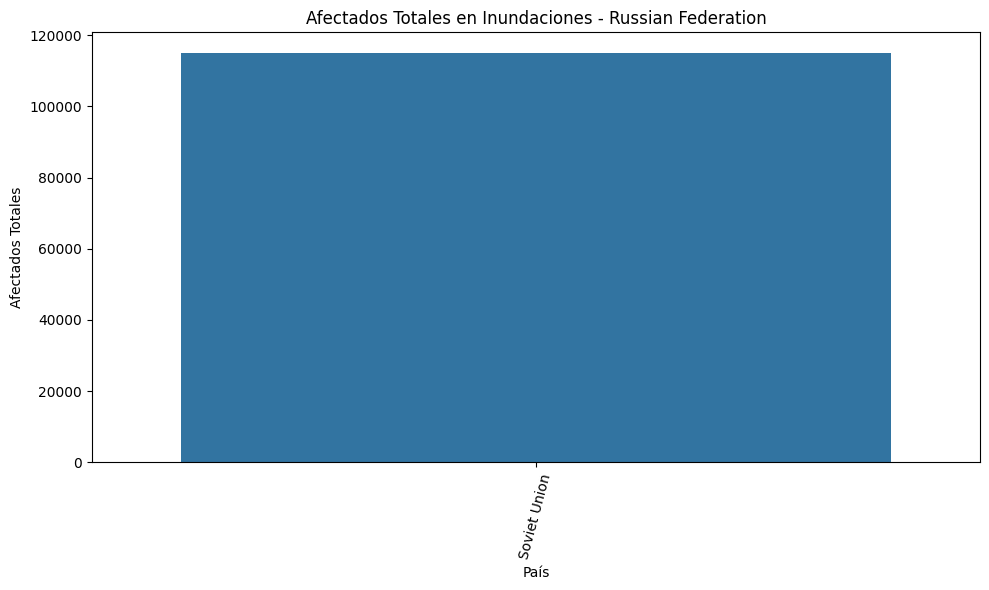

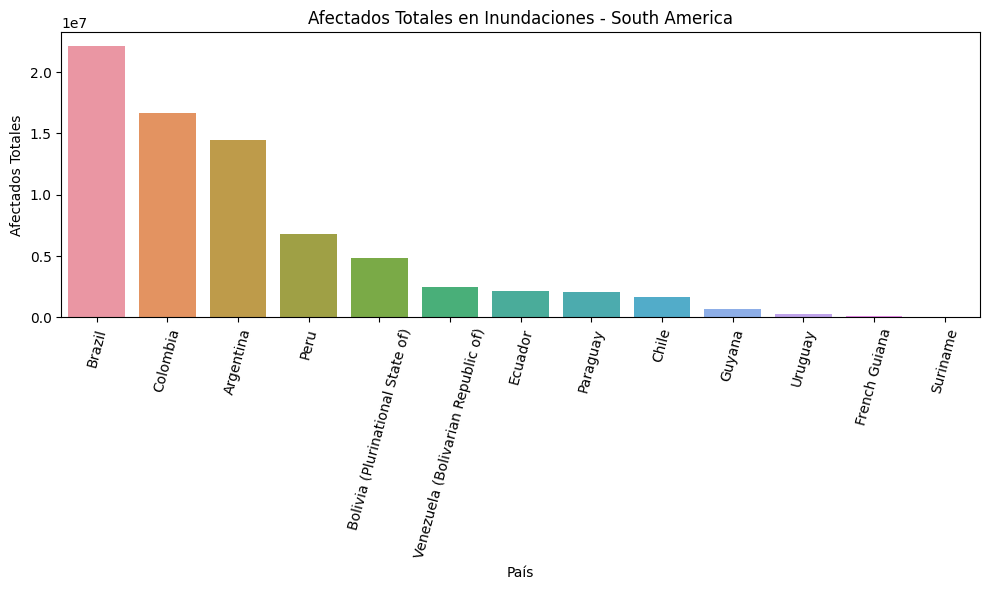

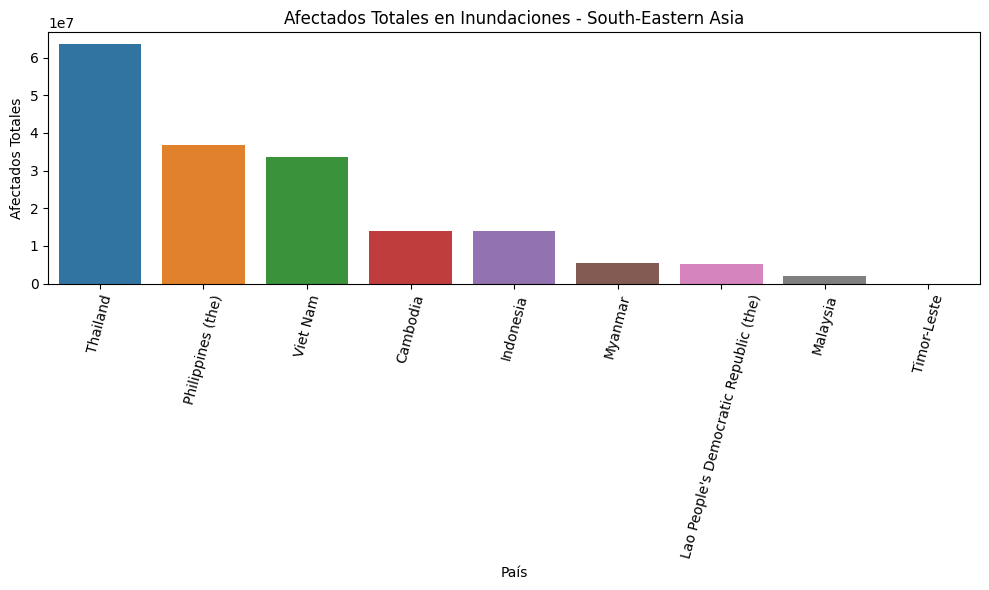

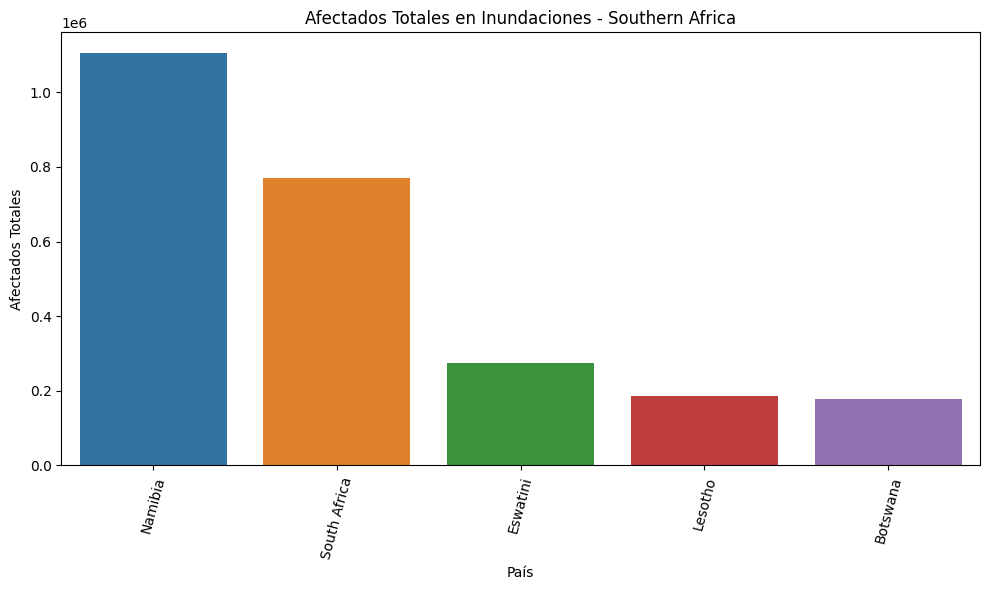

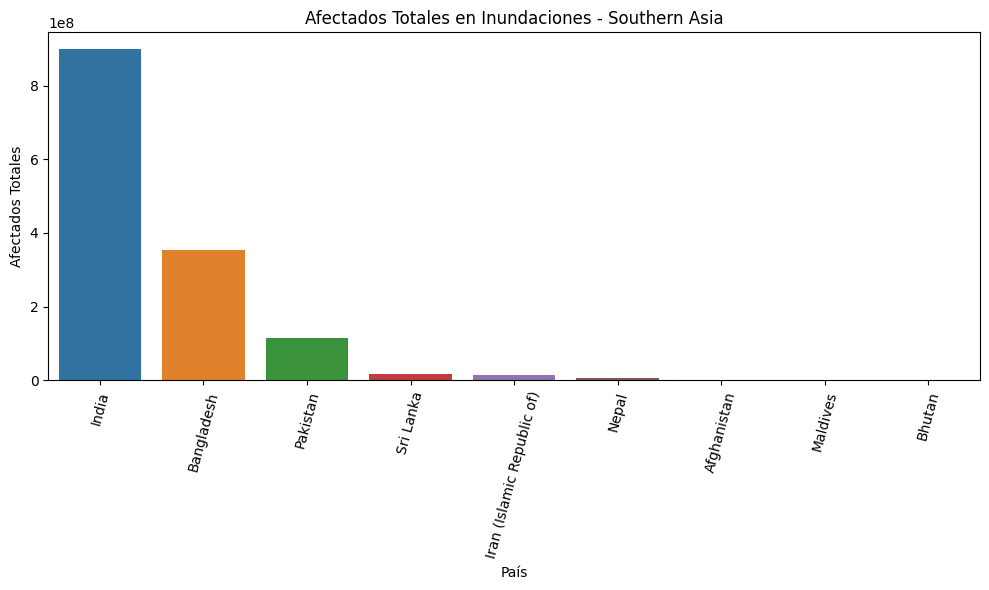

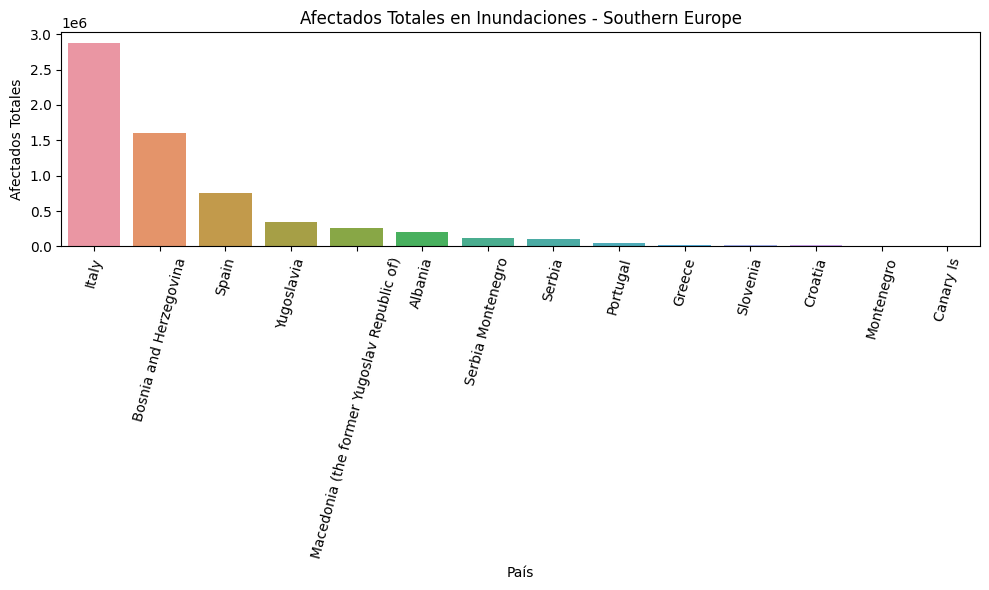

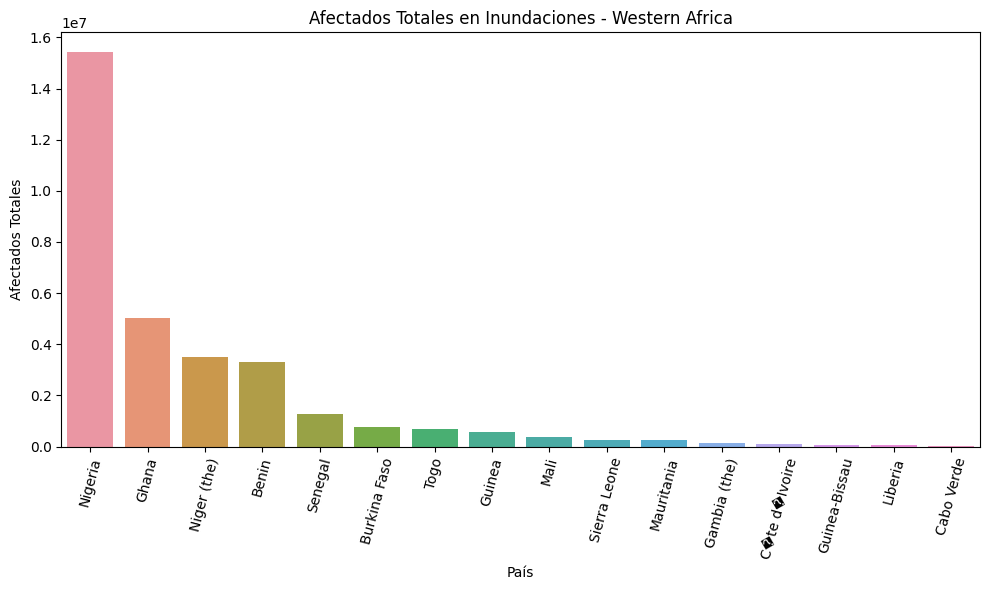

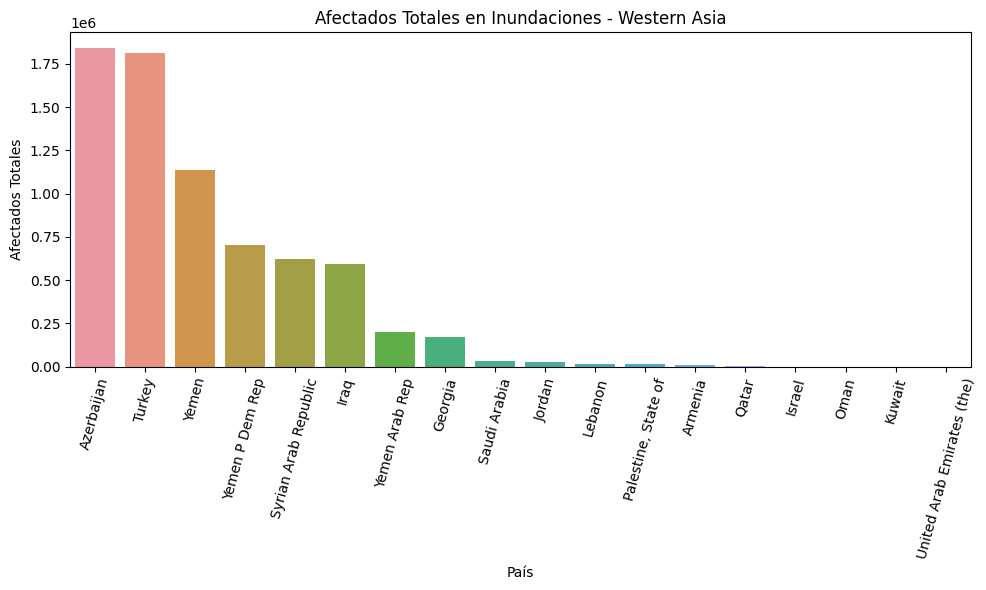

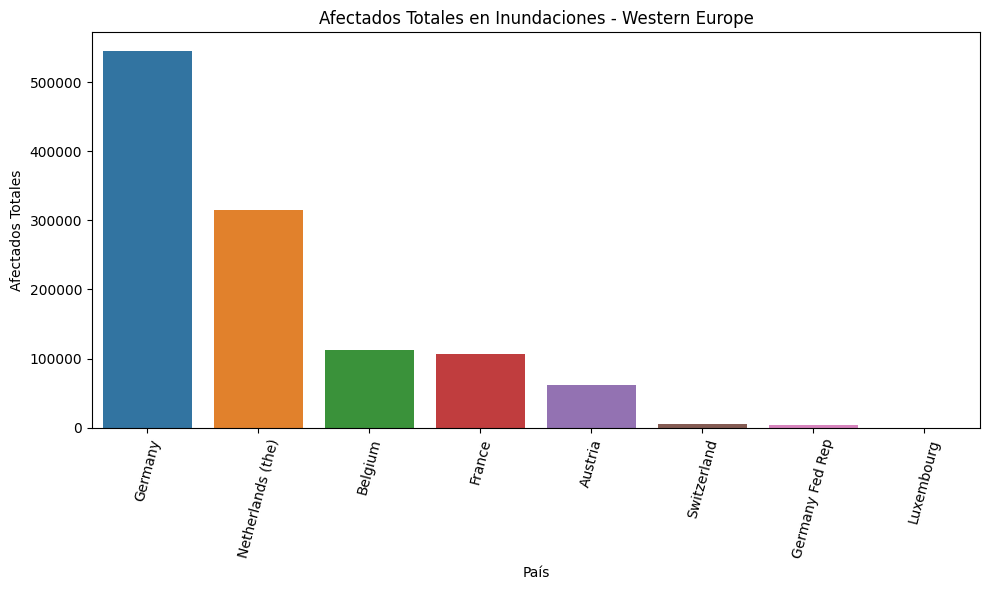

In [33]:
# Agrupar por región y calcular la suma total de muertes por cada país
region_country_deaths = df_flood.groupby(['Region', 'Country'])['Total Affected'].sum().reset_index()

# Ordenar por Region y Total Deaths
region_country_deaths = region_country_deaths.sort_values(['Region', 'Total Affected'], ascending=[True, False])

# Unique de regiones
regions = region_country_deaths['Region'].unique()

# Crear barplot separado por cada región
for region in regions:
    plt.figure(figsize=(10, 6))
    region_data = region_country_deaths[region_country_deaths['Region'] == region]
    sns.barplot(data=region_data, x='Country', y='Total Affected')
    plt.title(f'Afectados Totales en Inundaciones - {region}')
    plt.xlabel('País')
    plt.ylabel('Afectados Totales')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorith

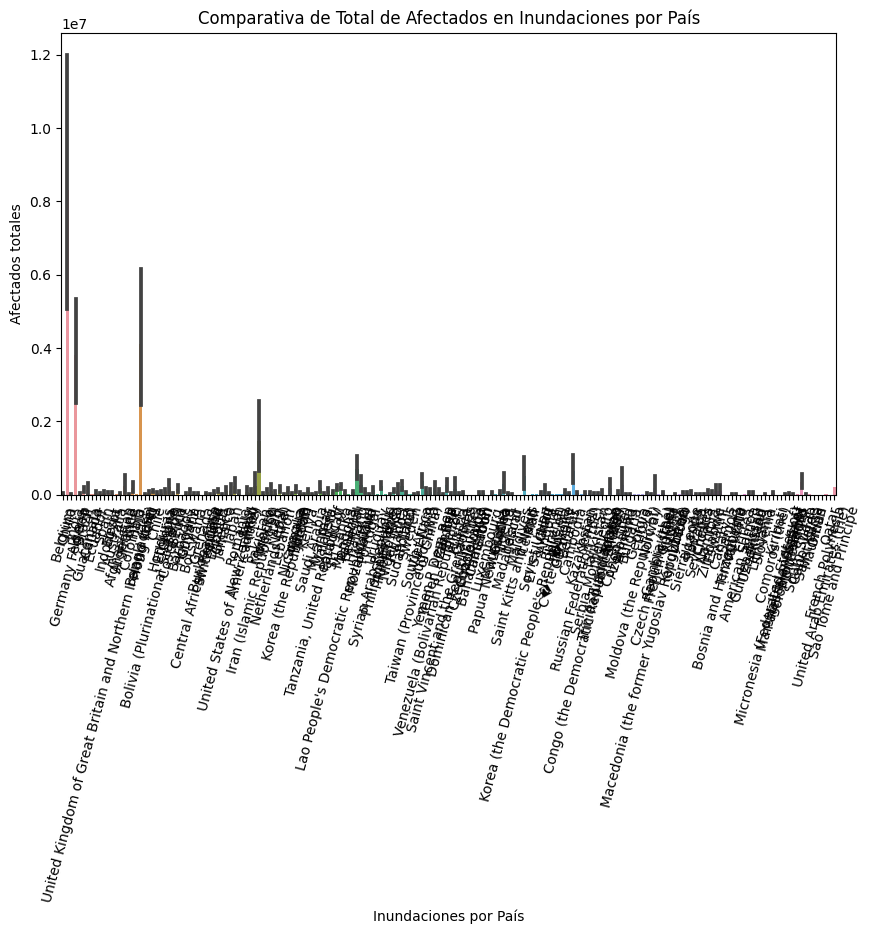

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Country', y='Total Affected')
plt.title('Comparativa de Total de Afectados en Inundaciones por País')
plt.xlabel('Inundaciones por País')
plt.ylabel('Afectados totales')
plt.xticks(rotation=75)
plt.show()

### DataFrames de Muertes por Continente, Región y Países

In [35]:
deaths_by_continent = df_flood.groupby('Continent')[['Total Deaths', 'Total Affected']].sum().reset_index()
# deaths_by_continent['Total Affected'] = deaths_by_continent['Total Affected'].astype(int)  # Convertir a int
deaths_by_continent

Continent  Total Deaths  Total Affected
0    Africa       34079.0    1.016998e+08
1  Americas      107586.0    1.081456e+08
2      Asia     6852022.0    3.739342e+09
3    Europe        9766.0    1.735911e+07
4   Oceania         629.0    1.643549e+06

In [36]:
deaths_by_region = df_flood.groupby('Region')['Total Deaths', 'Total Affected'].sum().reset_index()
deaths_by_region

C:\Users\AleEng\AppData\Local\Temp\ipykernel_32556\3972008501.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  deaths_by_region = df_flood.groupby('Region')['Total Deaths', 'Total Affected'].sum().reset_index()


Region  Total Deaths  Total Affected
0   Australia and New Zealand         396.0    6.333780e+05
1                   Caribbean        6399.0    7.641682e+06
2             Central America       47948.0    1.335667e+07
3                Central Asia        1708.0    1.118723e+06
4              Eastern Africa       13657.0    4.347487e+07
5                Eastern Asia     6643416.0    2.150871e+09
6              Eastern Europe        3321.0    9.239617e+06
7                   Melanesia         227.0    1.003899e+06
8                  Micronesia           0.0    1.265000e+03
9               Middle Africa        2445.0    7.451609e+06
10            Northern Africa       10130.0    1.641971e+07
11           Northern America        3171.0    1.279845e+07
12            Northern Europe         115.0    4.613230e+05
13                  Polynesia           6.0    5.007000e+03
14         Russian Federation         148.0    1.150740e+05
15              South America       50068.0    7.434879e+07
16         South-Eastern Asia       25161.0    1.742715e+08
17            Southern Africa        2390.0    2.514102e+06
18              Southern Asia      176870.0    1.405892e+09
19            Southern Europe        3465.0    6.392821e+06
20             Western Africa        5457.0    3.183951e+07
21               Western Asia        4867.0    7.188706e+06
22             Western Europe        2717.0    1.150271e+06

In [37]:
total_deaths_by_country = df_flood.groupby('Country')['Total Deaths', 'Total Affected'].sum().reset_index()
total_deaths_by_country

C:\Users\AleEng\AppData\Local\Temp\ipykernel_32556\1477779577.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_deaths_by_country = df_flood.groupby('Country')['Total Deaths', 'Total Affected'].sum().reset_index()


Country  Total Deaths  Total Affected
0        Afghanistan        5923.0       1895893.0
1            Albania          23.0        205670.0
2            Algeria        4895.0        809145.0
3     American Samoa           6.0             3.0
4             Angola         879.0       1337280.0
..               ...           ...             ...
185   Yemen Arab Rep         150.0        202862.0
186  Yemen P Dem Rep         507.0        705000.0
187       Yugoslavia          95.0        348000.0
188           Zambia          81.0       6083870.0
189         Zimbabwe         313.0        344022.0

[190 rows x 3 columns]

In [38]:
deaths_by_country = df_flood.groupby('Country')['Total Deaths'].value_counts()
deaths_by_country

Country      Total Deaths
Afghanistan  10.0            5
             20.0            5
             30.0            5
             11.0            3
             16.0            3
                            ..
Zimbabwe     24.0            1
             26.0            1
             36.0            1
             70.0            1
             125.0           1
Name: Total Deaths, Length: 2666, dtype: int64

In [39]:
affected_by_country = df_flood.groupby('Country')['Total Affected'].value_counts()
affected_by_country

Country      Total Affected
Afghanistan  2500.0            3
             4000.0            3
             20.0              2
             100.0             2
             500.0             2
                              ..
Zimbabwe     9700.0            1
             15000.0           1
             18000.0           1
             30000.0           1
             266000.0          1
Name: Total Affected, Length: 4221, dtype: int64

# Visualizaciones

In [40]:
df_flood.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

## Heatmaps

### Segmentación de correlaciones: por tipo, geográfica y temporal

In [57]:
df_flood_corr_type = df_flood[['Disaster Subtype', 'Associated Dis']]
df_flood_corr_geo = df_flood[['Continent', 'Region', 'Country', 'Location', 'Origin']]
df_flood_corr_temp = df_flood[['Start Day', 'End Day', 'Start Month', 'End Month', 'Start Year', 'End Year']]
df_flood_corr_magn = df_flood[['Dis Mag Value', 'Dis Mag Scale']]
df_flood_corr_geoloc = df_flood[['Latitude', 'Longitude']]

C:\Users\AleEng\AppData\Local\Temp\ipykernel_32556\910190916.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flood.corr(), annot=True, cmap='Blues', cbar=False)


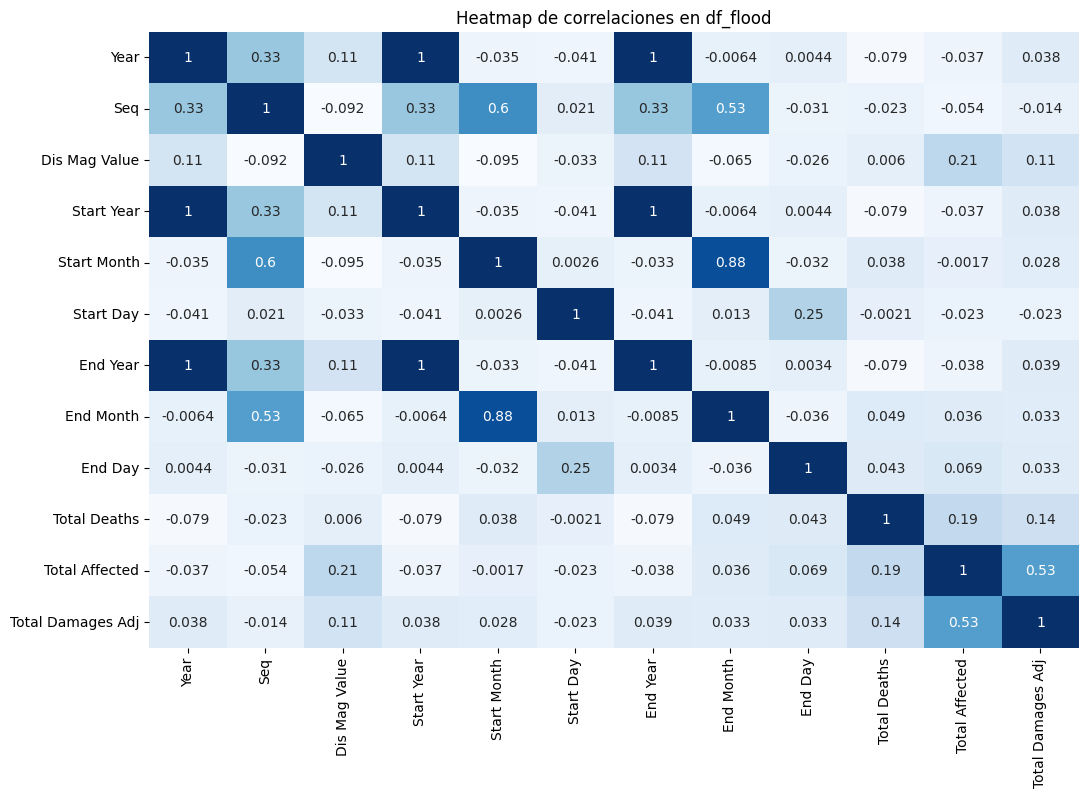

In [58]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_flood.corr(), annot=True, cmap='Blues', cbar=False)
plt.title('Heatmap de correlaciones en df_flood')
plt.show()

### Correlaciones por tipo de desastre

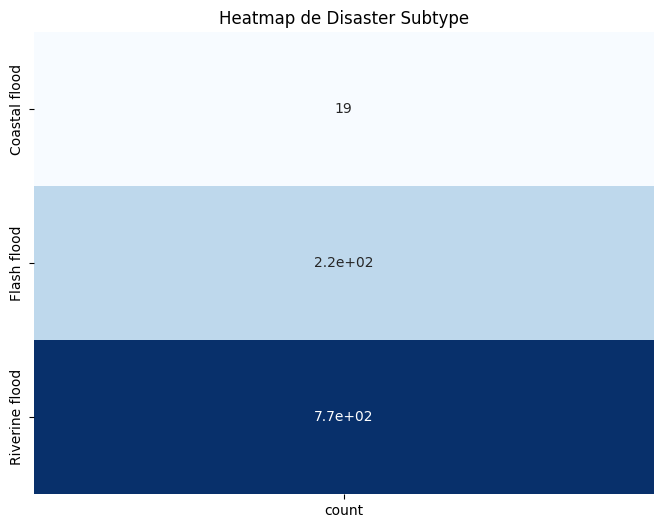

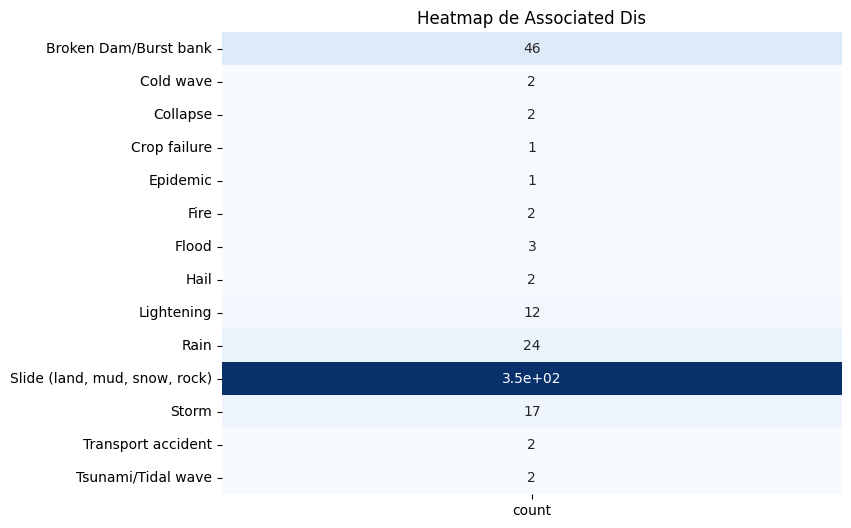

In [59]:
for column in df_flood_corr_type:
    crosstab = pd.crosstab(df_flood_corr_type[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Correlaciones geográficas

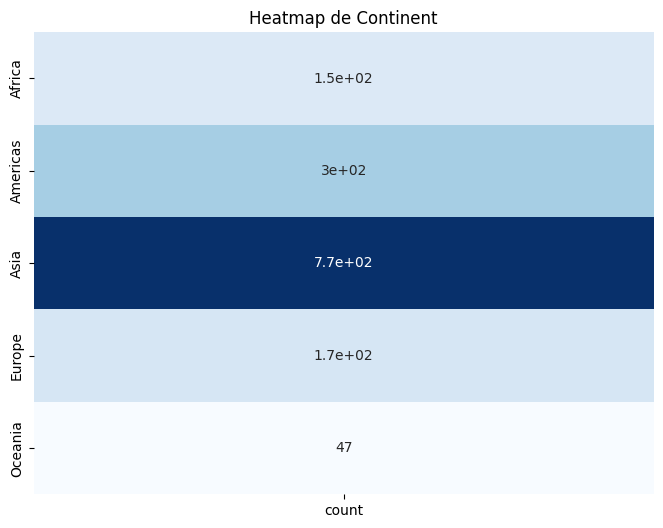

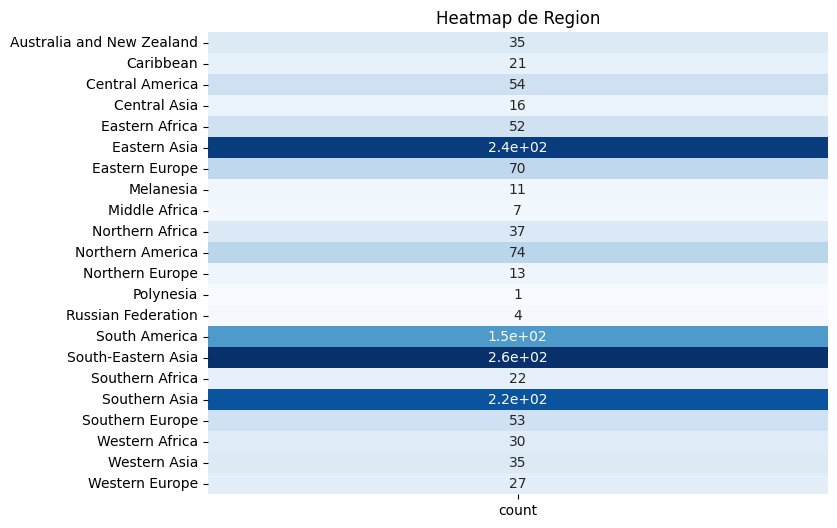

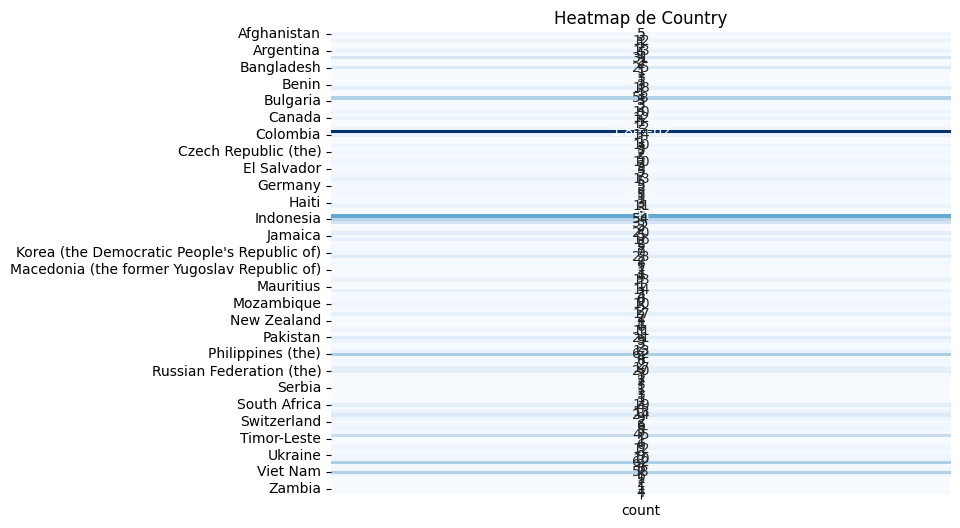

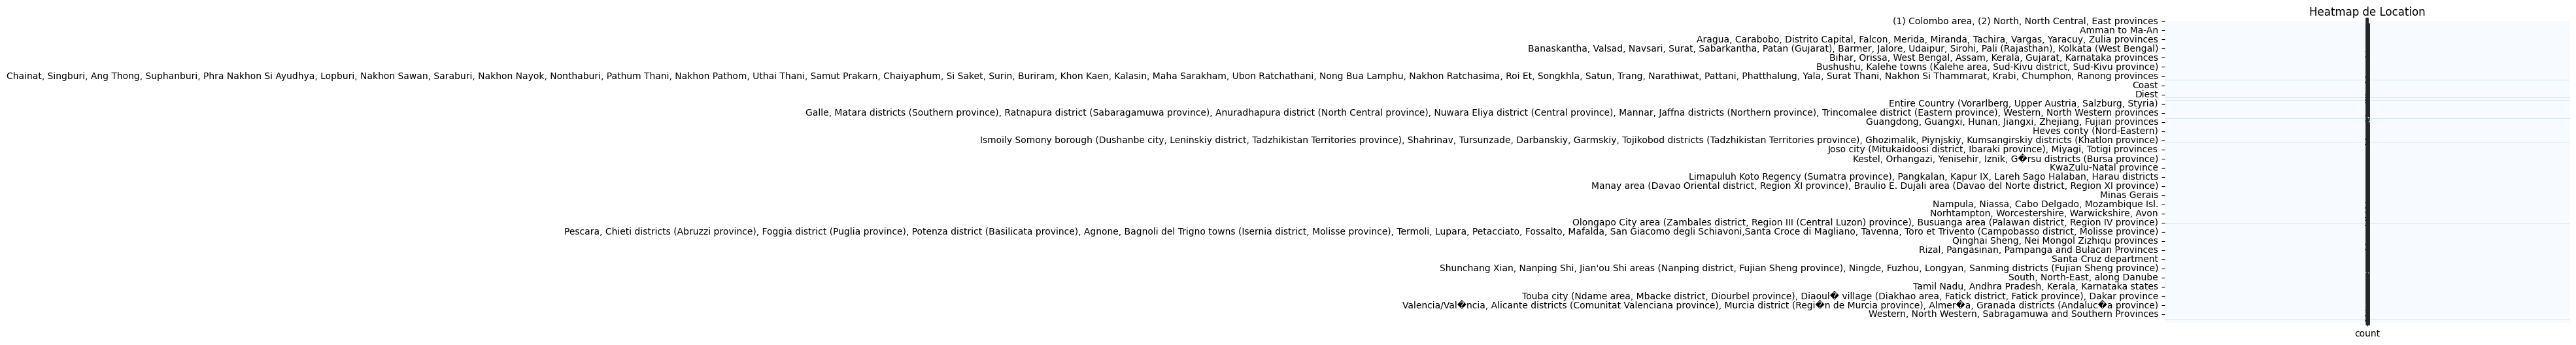

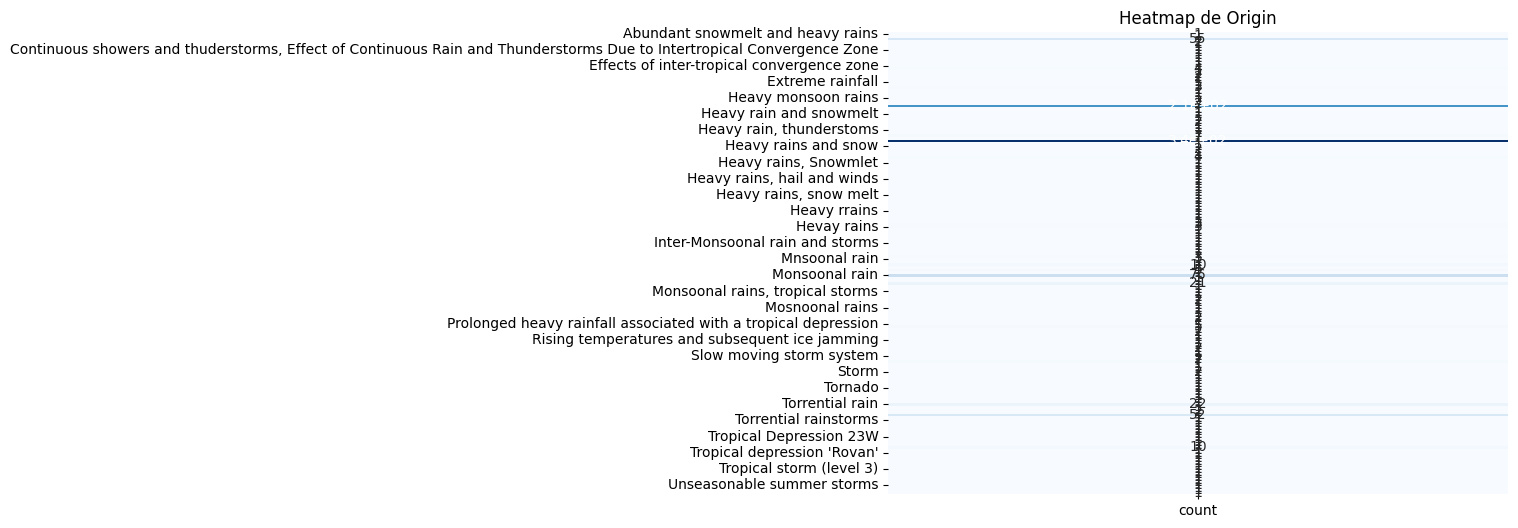

In [60]:
for column in df_flood_corr_geo:
    crosstab = pd.crosstab(df_flood_corr_geo[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Correlaciones temporales

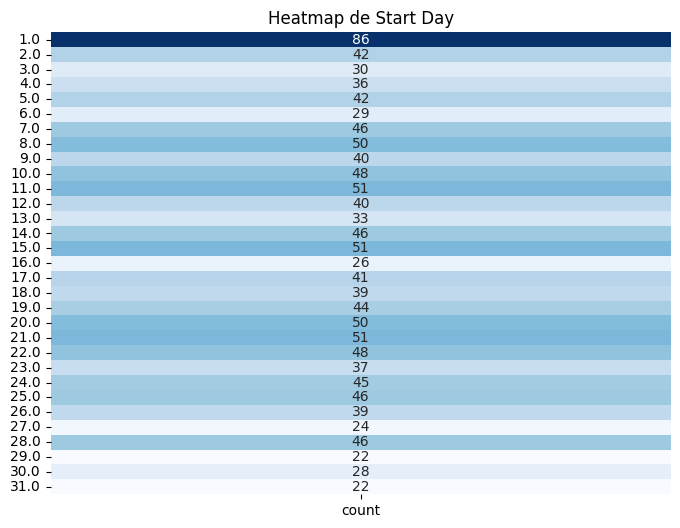

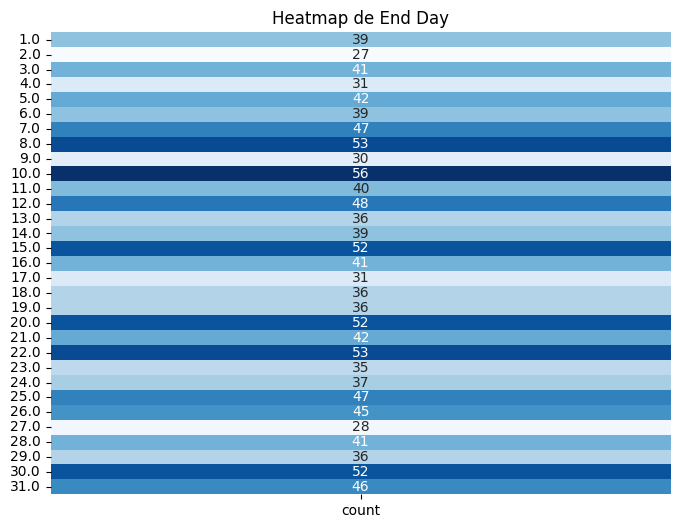

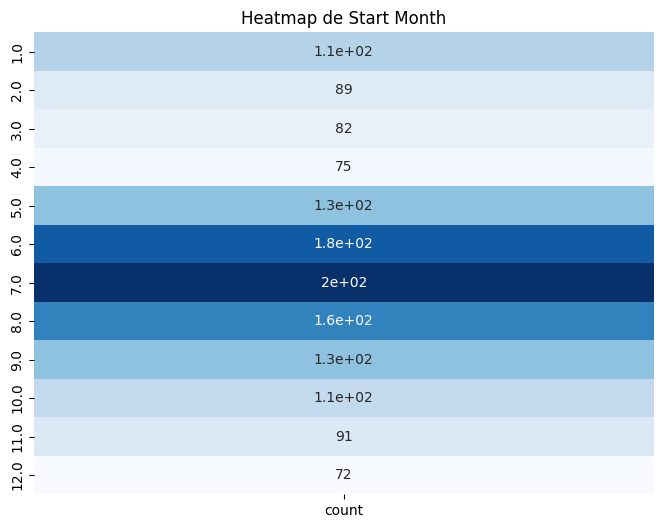

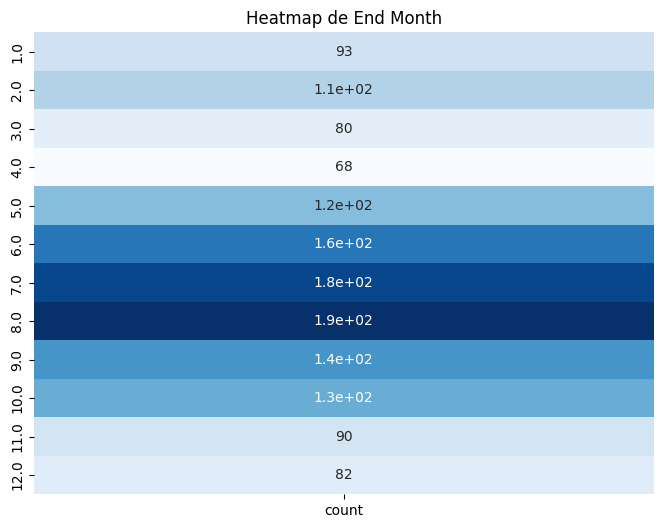

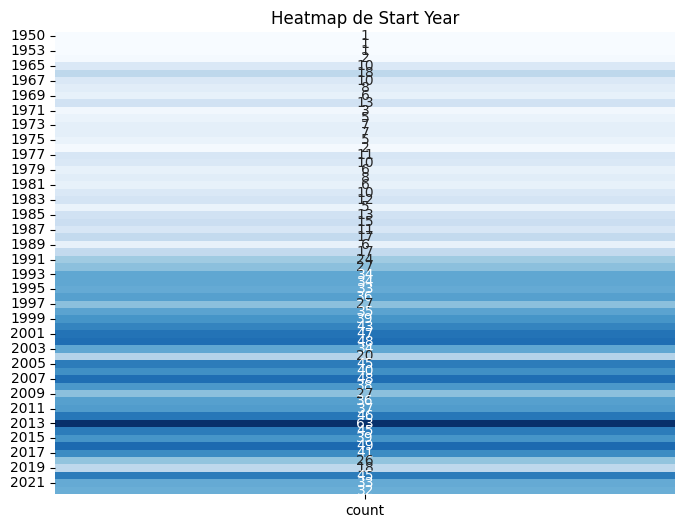

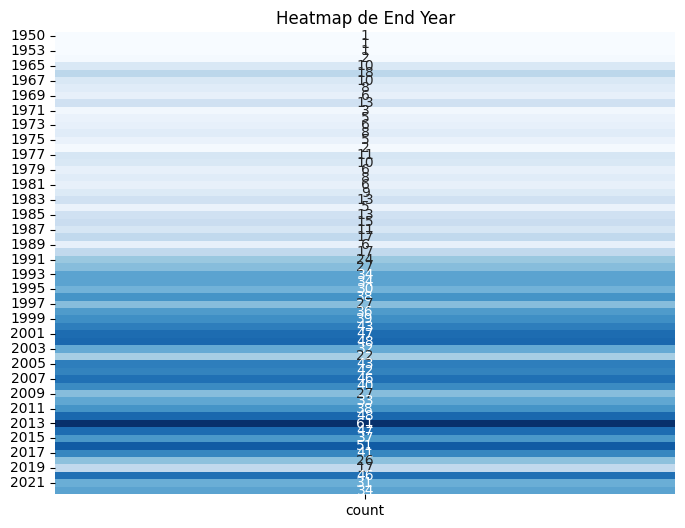

In [61]:
for column in df_flood_corr_temp:
    crosstab = pd.crosstab(df_flood_corr_temp[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [62]:
origin_stats = df_flood.groupby('Origin').agg({
    'Disaster Subtype': 'count',  # Total de inundaciones
    'Total Deaths': 'sum',
    'Total Affected': 'sum'
}).reset_index()

# Ordenar por Total Deaths
origin_stats = origin_stats.sort_values('Total Deaths', ascending=False, inplace=True)
origin_stats

# Pivot Tables

## Profundización de Análisis de Impacto Geográfico con Pivot Tables

In [63]:
impact_order = ['Total Deaths', 'Total Affected', 'Total Damages Adj']

### Impacto por subtipo de desastre

#### Por país

In [68]:
df_flood_impact_country = df_flood.dropna(subset=['Country', 'Total Deaths', 'Total Affected', 'Total Damages Adj'])
df_flood_impact_country_pivot = df_flood_impact_country.pivot_table(
    index='Country',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)
df_flood_impact_country_pivot

Total Affected                            Total Damages Adj  \
Disaster Subtype  Coastal flood Flash flood Riverine flood     Coastal flood   
Country                                                                        
Afghanistan                   0       14035         168416                 0   
Albania                       0       56002          66884                 0   
Algeria                       0       59050         110775                 0   
American Samoa                0           3              0                 0   
Angola                        0       30250          70000                 0   
...                         ...         ...            ...               ...   
Viet Nam                4292316     1034938       17444981           1144791   
Yemen                         0      198223         264710                 0   
Yemen P Dem Rep               0      350000         340000                 0   
Yugoslavia                    0           0          95000                 0   
Zimbabwe                      0        1002         284000                 0   

                                             Total Deaths              \
Disaster Subtype Flash flood Riverine flood Coastal flood Flash flood   
Country                                                                 
Afghanistan            12052         156213             0         531   
Albania                25226          28472             0          12   
Algeria               473027        1515407             0          93   
American Samoa         79544              0             0           6   
Angola                  2388          16995             0          11   
...                      ...            ...           ...         ...   
Viet Nam              780089        4487829           803         511   
Yemen                 566325        2260688             0         102   
Yemen P Dem Rep      2956875          77905             0         482   
Yugoslavia                 0        3222996             0           0   
Zimbabwe               24724         442069             0           3   

                                 
Disaster Subtype Riverine flood  
Country                          
Afghanistan                 454  
Albania                       1  
Algeria                     982  
American Samoa                0  
Angola                       31  
...                         ...  
Viet Nam                   2946  
Yemen                       376  
Yemen P Dem Rep              25  
Yugoslavia                    3  
Zimbabwe                     72  

[128 rows x 9 columns]

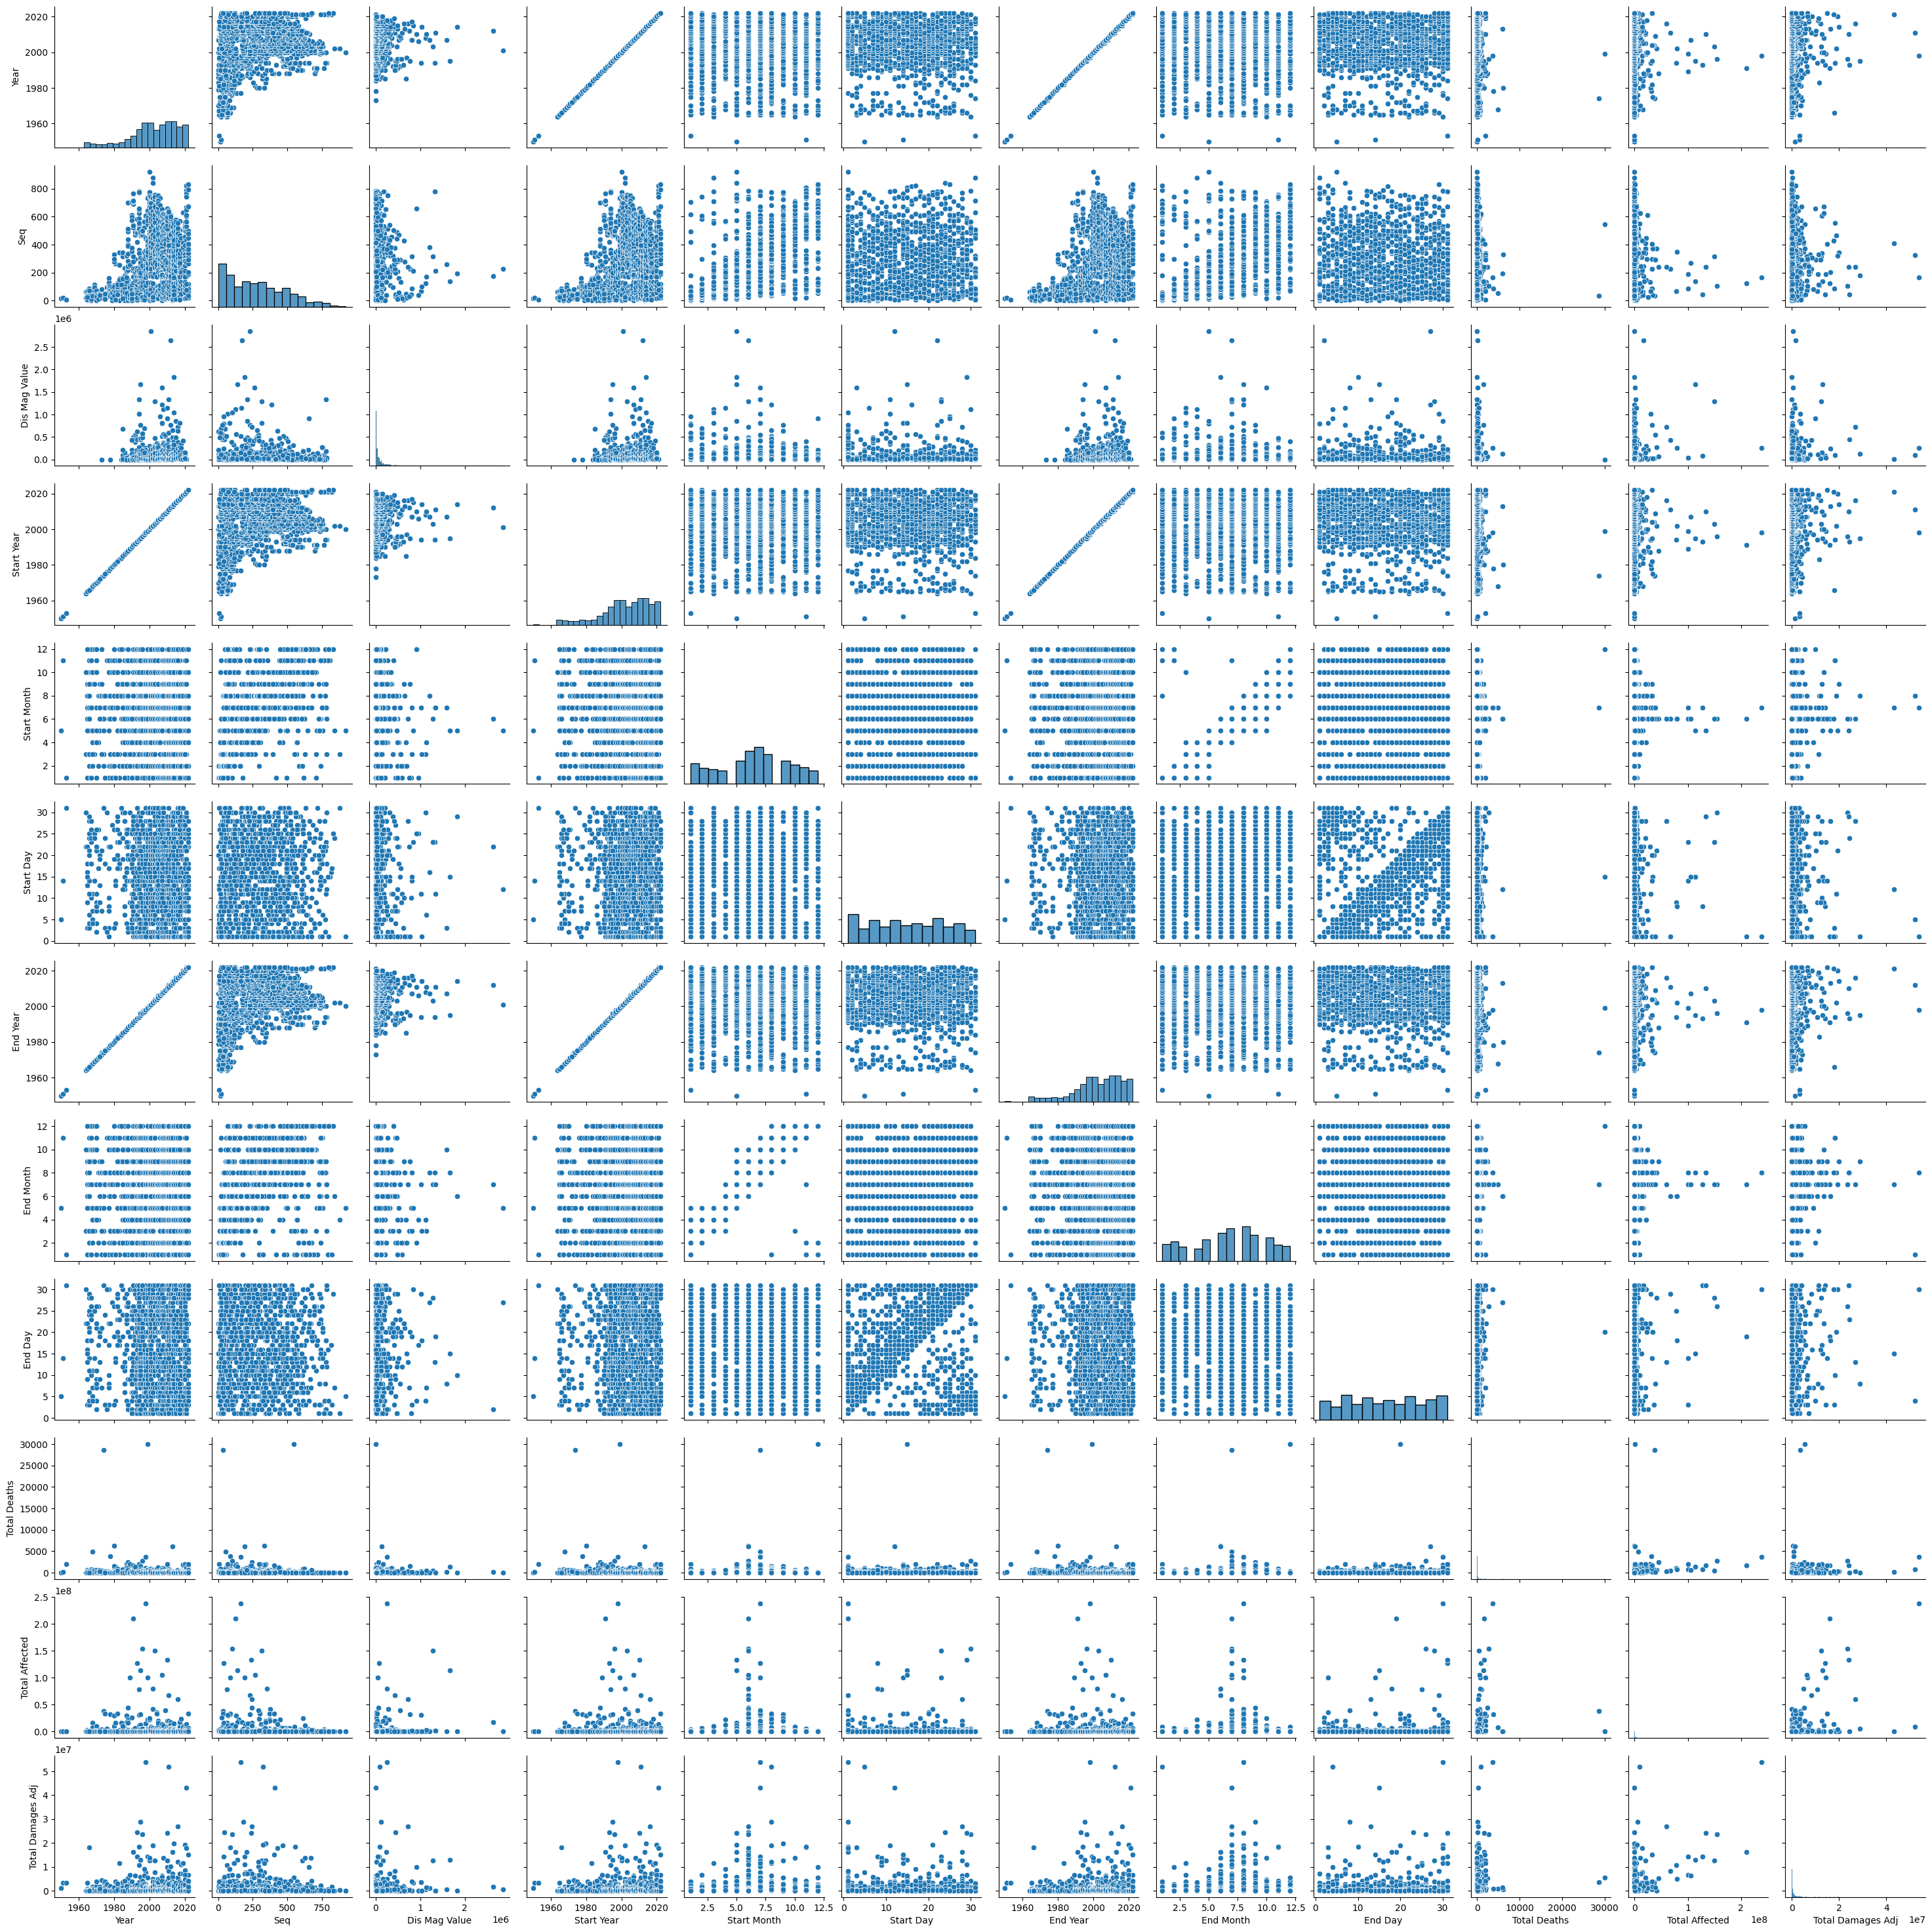

In [83]:
sns.pairplot(df_flood)
plt.show()

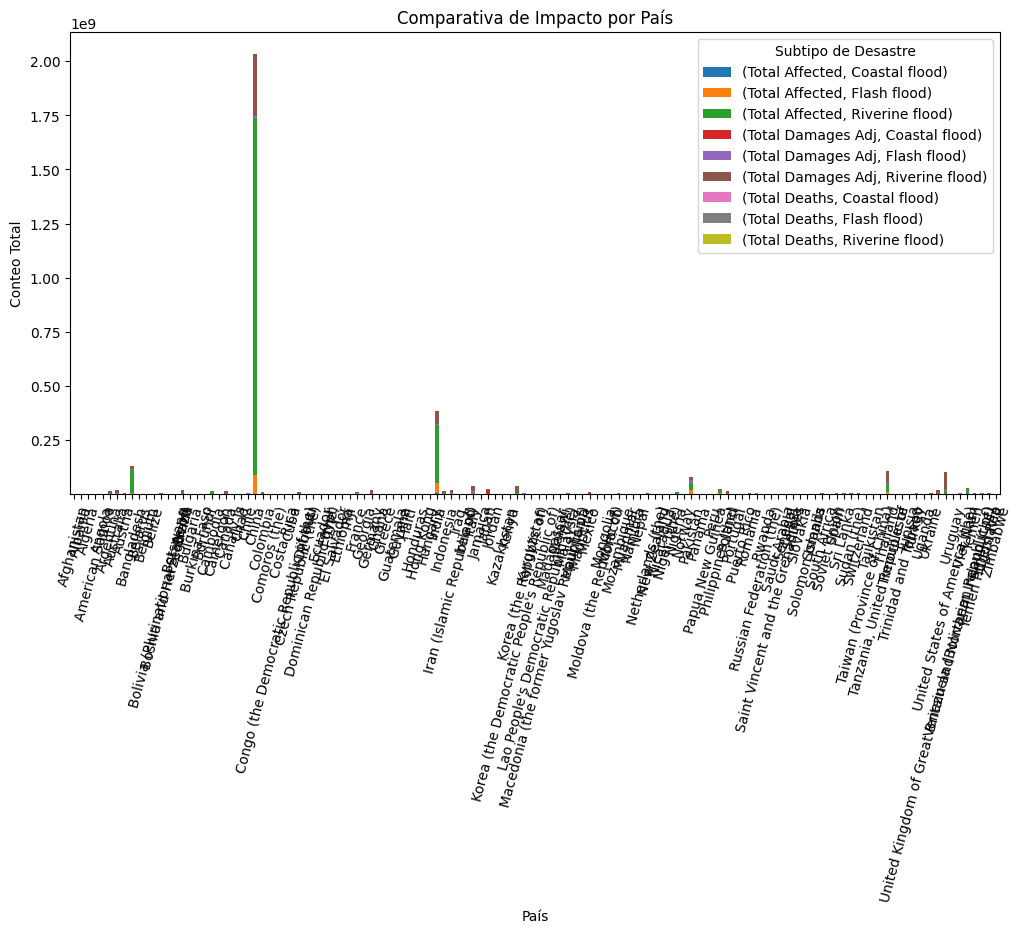

In [73]:
df_flood_impact_country_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Comparativa de Impacto por País')
plt.xlabel('País')
plt.ylabel('Conteo Total')
plt.legend(title='Subtipo de Desastre')
plt.xticks(rotation=75)
plt.show()


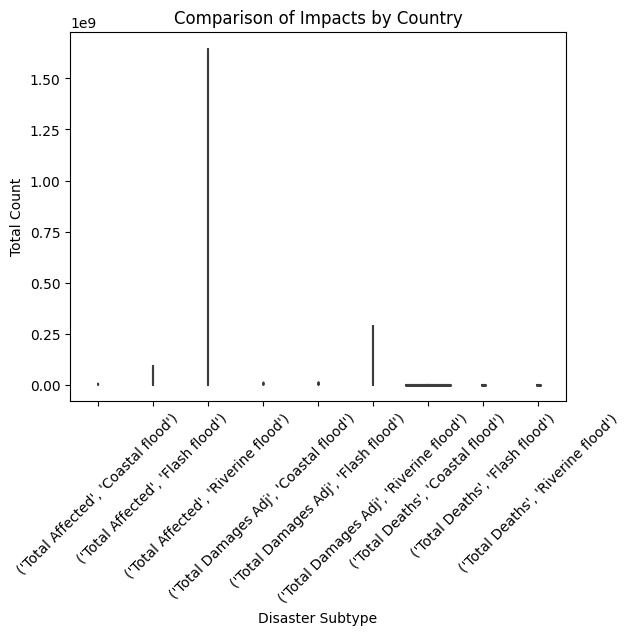

In [81]:
sns.violinplot(data=df_flood_impact_country_pivot, inner='stick', cut=0)
plt.title('Comparison of Impacts by Country')
plt.xlabel('Disaster Subtype')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

#### Por Location

In [76]:
df_flood_impact_location = df_flood.dropna(subset=['Location', 'Total Deaths', 'Total Affected', 'Total Damages Adj'])
df_flood_impact_location_pivot = df_flood_impact_location.pivot_table(
    index='Location',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)
df_flood_impact_location_pivot

Total Affected              \
Disaster Subtype                                    Coastal flood Flash flood   
Location                                                                        
(1) Rajasthan, Gujarat - (2) North-East, West B...              0     7500000   
ARMM province (Maguindanao, Shariff Kabunsuan, ...              0      505102   
Abkhazia region                                                 0           0   
Accra                                                           0           0   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...              0           0   
...                                                           ...         ...   
Zhejiang Province (including Wenzhou, Taizhou a...              0     5165000   
Zhenxiong Xian area (Zhaotong district, Yunnan ...              0           0   
Zonguldak, Karabuk, Bartin, Sakarya                             0     1240047   
city of Durban (Kwazulu-Natal Province)                         0         300   
governorates of Tunis and part of Nabeul                        0       30000   

                                                                   \
Disaster Subtype                                   Riverine flood   
Location                                                            
(1) Rajasthan, Gujarat - (2) North-East, West B...              0   
ARMM province (Maguindanao, Shariff Kabunsuan, ...              0   
Abkhazia region                                               300   
Accra                                                      700000   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...          87000   
...                                                           ...   
Zhejiang Province (including Wenzhou, Taizhou a...              0   
Zhenxiong Xian area (Zhaotong district, Yunnan ...          10009   
Zonguldak, Karabuk, Bartin, Sakarya                             0   
city of Durban (Kwazulu-Natal Province)                         0   
governorates of Tunis and part of Nabeul                        0   

                                                   Total Damages Adj  \
Disaster Subtype                                       Coastal flood   
Location                                                               
(1) Rajasthan, Gujarat - (2) North-East, West B...                 0   
ARMM province (Maguindanao, Shariff Kabunsuan, ...                 0   
Abkhazia region                                                    0   
Accra                                                              0   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...                 0   
...                                                              ...   
Zhejiang Province (including Wenzhou, Taizhou a...                 0   
Zhenxiong Xian area (Zhaotong district, Yunnan ...                 0   
Zonguldak, Karabuk, Bartin, Sakarya                                0   
city of Durban (Kwazulu-Natal Province)                            0   
governorates of Tunis and part of Nabeul                           0   

                                                                               \
Disaster Subtype                                   Flash flood Riverine flood   
Location                                                                        
(1) Rajasthan, Gujarat - (2) North-East, West B...      792566              0   
ARMM province (Maguindanao, Shariff Kabunsuan, ...       31320              0   
Abkhazia region                                              0           4225   
Accra                                                        0          24006   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...           0           2603   
...                                                        ...            ...   
Zhejiang Province (including Wenzhou, Taizhou a...     1136711              0   
Zhenxiong Xian area (Zhaotong district, Yunnan ...           0          15969   
Zonguldak, Karabuk, Bartin, Sakarya              

#### Por Origin

In [ ]:
df_flood_impact_origin = df_flood.dropna(subset=['Origin', 'Total Deaths', 'Total Affected', 'Total Damages Adj'], inplace=True)

In [ ]:
df_flood_impact_origin_pivot = df_flood_impact_origin.pivot_table(
    index='Origin',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)
df_flood_impact_origin_pivot

Total Affected                             \
Disaster Subtype                   Coastal flood Flash flood Riverine flood   
Origin                                                                        
Abundant snowmelt and heavy rains              0           0          16000   
Breif torrential rain                          0      483635              0   
Brief torrential rain                          0    14922324         111667   
Brief torrential rains                         0         536              0   
Continous rainfall                             0           0         201472   
...                                          ...         ...            ...   
Typhoon Bolaven                                0           0         210000   
Typhoon Peipah                            150000           0              0   
Unseasonable summer storms                     0        2500              0   
Violent thunderstorms                          0           0            600   
continuous rain                                0           0         213000   

                                  Total Damages Adj              \
Disaster Subtype                      Coastal flood Flash flood   
Origin                                                            
Abundant snowmelt and heavy rains                 0           0   
Breif torrential rain                             0     5551789   
Brief torrential rain                             0    29324263   
Brief torrential rains                            0     1237450   
Continous rainfall                                0           0   
...                                             ...         ...   
Typhoon Bolaven                                   0           0   
Typhoon Peipah                               494010           0   
Unseasonable summer storms                        0      309879   
Violent thunderstorms                             0           0   
continuous rain                                   0           0   

                                                  Total Deaths              \
Disaster Subtype                  Riverine flood Coastal flood Flash flood   
Origin                                                                       
Abundant snowmelt and heavy rains          87170             0           0   
Breif torrential rain                          0             0       30000   
Brief torrential rain                    1296316             0        4420   
Brief torrential rains                         0             0         108   
Continous rainfall                         96026             0           0   
...                                          ...           ...         ...   
Typhoon Bolaven                           390047             0           0   
Typhoon Peipah                                 0            55           0   
Unseasonable summer storms                     0             0           2   
Violent thunderstorms                       2513             0           0   
continuous rain                             7763             0           0   

                                                  
Disaster Subtype                  Riverine flood  
Origin                                            
Abundant snowmelt and heavy rains              2  
Breif torrential rain                          0  
Brief torrential rain                         59  
Brief torrential rains                         0  
Continous rainfall                            18  
...                                          ...  
Typhoon Bolaven                               15  
Typhoon Peipah                                 0  
Unseasonable summer storms                     0  
Violent thunderstorms                         19  
continuous rain                               17  

[139 rows x 9 columns]

## Profundización de Análisis de Impacto Temporal con Pivot Tables

#### Por Año

In [ ]:
df_flood_impact_year = df_flood.dropna(subset=['Year', 'Total Deaths', 'Total Affected', 'Total Damages Adj'], inplace=True)

In [ ]:
df_flood_impact_year_pivot = df_flood_impact_year.pivot_table(
    index='Year',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)

df_flood_impact_year_pivot

Total Affected                            Total Damages Adj  \
Disaster Subtype  Coastal flood Flash flood Riverine flood     Coastal flood   
Year                                                                           
1953                     300000           0              0           3274160   
1965                          0         500          95000                 0   
1966                          0        8392        1117202                 0   
1968                          0     7500000           1000                 0   
1969                          0       38305              0                 0   
1970                          0           0        1301650                 0   
1972                          0           0        1126785                 0   
1976                          0       14313              0                 0   
1977                          0        2700              0                 0   
1982                          0      350000              0                 0   
1983                          0       50000            212                 0   
1985                          0          30        2254250                 0   
1986                          0           0         876919                 0   
1987                          0           0       48098364                 0   
1988                          0         300       28724053                 0   
1989                          0           0        1021300                 0   
1990                          0         236       28943253                 0   
1991                          0      702663      217083918                 0   
1992                          0       43433        7998836                 0   
1993                      67447     1546117        1577410            116691   
1994                       2762           0      114883309                73   
1995                          0       34985      160483091                 0   
1996                          0       24063      175485346                 0   
1997                          0      900030        2840100                 0   
1998                      26375     1519377      257463504           1371637   
1999                    4227577     8599020      103859929           1210149   
2000                     360110     3469289       62018299          12644320   
2001                    1349326     6047982       16192947            125117   
2002                          0    83695392       47965643                 0   
2003                     286777      828353      160091504            118711   
2004                          0       31175      111414896                 0   
2005                          0     1011205       65724829                 0   
2006                          0      831517       13196470                 0   
2007                    7782593     2626150      127059016           1069207   
2008                          0     8935881       25761254                 0   
2009                          0      540122       47737560                 0   
2010                          0    23202509      153340141                 0   
2011                          0      872849      119538023                 0   
2012                          0      131428       53941888                 0   
2013                          0      509851       25955153                 0   
2014                          0      800968       35204739                 0   
2015                          0      278690        4836931                 0   
2016                          0     2298183        3375622                 0   
2017                          0       87503        1960068                 0   
2018                          0    23416642         736000                 0   
2019                          0      561150          11900                 0   
2020                          0      959046          22067                 0   
2021             

#### Por Mes

In [ ]:
df_flood_impact_startmonth = df_flood.dropna(subset=['Start Month', 'End Month', 'Disaster Subtype', 'Total Deaths', 'Total Affected', 'Total Damages Adj'], inplace=False)
df_flood_impact_startmonth.isna().sum()

Dis No                 0
Year                   0
Seq                    0
Disaster Subgroup      0
Disaster Type          0
Disaster Subtype       0
Country                0
ISO                    0
Region                 0
Continent              0
Location               9
Origin               175
Associated Dis       639
Dis Mag Value        415
Dis Mag Scale          0
Latitude             764
Longitude            764
Start Year             0
Start Month            0
Start Day             46
End Year               0
End Month              0
End Day               48
Total Deaths           0
Total Affected         0
Total Damages Adj      0
dtype: int64

In [ ]:
df_flood_impact_startmonth_pivot = df_flood_impact_startmonth.pivot_table(
    index='Start Month',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)

df_flood_impact_startmonth_pivot

Total Affected                            Total Damages Adj  \
Disaster Subtype  Coastal flood Flash flood Riverine flood     Coastal flood   
Start Month                                                                    
1.0                     1350701     1232986       15217186           3634323   
2.0                           0      139085       14555409                 0   
3.0                           0     1986537        7926225                 0   
4.0                           0      513643       21150919                 0   
5.0                        2762     6019946      269942308                73   
6.0                           0    88803554     1117537405                 0   
7.0                      300000    35268542      496283136             54542   
8.0                      416130    26855811      115200527            183489   
9.0                     8375722    10826927      140466556          15024976   
10.0                    3726186     6494512       19858934            467292   
11.0                     231466     3440810        8196934            565370   
12.0                          0     3447487        4996893                 0   

                                             Total Deaths              \
Disaster Subtype Flash flood Riverine flood Coastal flood Flash flood   
Start Month                                                             
1.0                   972457       25268771          2142         203   
2.0                   433426       13195964             0         360   
3.0                  6497279       17948131             0        2472   
4.0                  2498217       24427677             0         299   
5.0                  5886765       85285826             1         973   
6.0                 10693681      200914424             0        2919   
7.0                 25017324      143654469            11        9085   
8.0                  7194957      131552793            74        3438   
9.0                  4821902       62797530          1058        1207   
10.0                19409900       16910201           674        1839   
11.0                 5468541       36857768            75         318   
12.0                11304835       21301485             0       30585   

                                 
Disaster Subtype Riverine flood  
Start Month                      
1.0                        3894  
2.0                        2564  
3.0                        1365  
4.0                        1826  
5.0                        4853  
6.0                       20461  
7.0                       16978  
8.0                       10870  
9.0                       11253  
10.0                       2158  
11.0                       3783  
12.0                       1190

In [88]:
import plotly.graph_objects as go
import pandas as pd

# Group the data by relevant columns and calculate the counts
df_sankey = df_flood.groupby(['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']).size().reset_index(name='Count')

# Create the node labels for the Sankey diagram
nodes = pd.unique(df_sankey[['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']].values.ravel('K'))

# Create the links between the nodes
link_source = [nodes.tolist().index(x) for x in df_sankey['Disaster Type']]
link_target = [nodes.tolist().index(x) for x in df_sankey['Disaster Subtype']]
link_value = df_sankey['Count']

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    )
)])

# Customize the layout of the Sankey diagram
fig.update_layout(
    title='Sankey Diagram of Flood Disasters',
    font=dict(size=10),
    height=600,
    width=800
)

# Show the Sankey diagram
fig.show()


In [92]:
import plotly.graph_objects as go
import pandas as pd

# Group the data by relevant columns and calculate the counts
df_sankey = df_flood.groupby(['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region', 'Dis Mag Scale']).size().reset_index(name='Count')

# Create the node labels for the Sankey diagram
nodes = pd.unique(df_sankey[['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region', 'Dis Mag Scale']].values.ravel('K'))

# Create the links between the nodes
link_source = [nodes.tolist().index(x) for x in df_sankey['Disaster Type']]
link_target1 = [nodes.tolist().index(x) for x in df_sankey['Disaster Subtype']]
link_target2 = [nodes.tolist().index(x) for x in df_sankey['Associated Dis']]
link_target3 = [nodes.tolist().index(x) for x in df_sankey['Region']]
link_target4 = [nodes.tolist().index(x) for x in df_sankey['Dis Mag Scale']]
link_value = df_sankey['Count']

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes
    ),
    link=dict(
        source=link_source,
        target=link_target1,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    ),
    link2=dict(
        source=link_target1,
        target=link_target2,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    ),
    link3=dict(
        source=link_target2,
        target=link_target3,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    ),
    link4=dict(
        source=link_target3,
        target=link_target4,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    )
)])

# Customize the layout of the Sankey diagram
fig.update_layout(
    title='Segmented Sankey Diagram of Flood Disasters',
    font=dict(size=10),
    height=600,
    width=800
)

# Show the Sankey diagram
fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.Sankey: 'link2'

Did you mean "link"?

    Valid properties:
        arrangement
            If value is `snap` (the default), the node arrangement
            is assisted by automatic snapping of elements to
            preserve space between nodes specified via `nodepad`.
            If value is `perpendicular`, the nodes can only move
            along a line perpendicular to the flow. If value is
            `freeform`, the nodes can freely move on the plane. If
            value is `fixed`, the nodes are stationary.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        domain
            :class:`plotly.graph_objects.sankey.Domain` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired. Note that this attribute is
            superseded by `node.hoverinfo` and `node.hoverinfo` for
            nodes and links respectively.
        hoverlabel
            :class:`plotly.graph_objects.sankey.Hoverlabel`
            instance or dict with compatible properties
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgrouptitle
            :class:`plotly.graph_objects.sankey.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        link
            The links of the Sankey plot.
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        node
            The nodes of the Sankey plot.
        orientation
            Sets the orientation of the Sankey diagram.
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        stream
            :class:`plotly.graph_objects.sankey.Stream` instance or
            dict with compatible properties
        textfont
            Sets the font for node labels
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        valueformat
            Sets the value formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
        valuesuffix
            Adds a unit to follow the value in the hover tooltip.
            Add a space if a separation is necessary from the
            value.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        
Did you mean "link"?

Bad property path:
link2
^^^^^

In [ ]:
df_flood[['Longitude', 'Latitude', 'Country']].reset_index().head(50)

index Longitude Latitude  \
0      12       NaN      NaN   
1      13       NaN      NaN   
2      34       NaN      NaN   
3      39       NaN      NaN   
4      43       NaN      NaN   
5      57       NaN      NaN   
6      75       NaN      NaN   
7      81       NaN      NaN   
8      84       NaN      NaN   
9      89       NaN      NaN   
10     92       NaN      NaN   
11    100       NaN      NaN   
12    110       NaN      NaN   
13    120       NaN      NaN   
14    123       NaN      NaN   
15    138       NaN      NaN   
16    176       NaN      NaN   
17    180       NaN      NaN   
18    188       NaN      NaN   
19    191       NaN      NaN   
20    196       NaN      NaN   
21    197       NaN      NaN   
22    199       NaN      NaN   
23    200       NaN      NaN   
24    202       NaN      NaN   
25    205       NaN      NaN   
26    209       NaN      NaN   
27    211       NaN      NaN   
28    219       NaN      NaN   
29    223       NaN      NaN   
30    224       NaN      NaN   
31    225       NaN      NaN   
32    227       NaN      NaN   
33    234       NaN      NaN   
34    235       NaN      NaN   
35    238       NaN      NaN   
36    246       NaN      NaN   
37    257       NaN      NaN   
38    258       NaN      NaN   
39    262       NaN      NaN   
40    269       NaN      NaN   
41    270       NaN      NaN   
42    271       NaN      NaN   
43    272       NaN      NaN   
44    273       NaN      NaN   
45    274       NaN      NaN   
46    276       NaN      NaN   
47    277       NaN      NaN   
48    278       NaN      NaN   
49    279       NaN      NaN   

                                              Country  
0                                             Belgium  
1                                             Belgium  
2                                               China  
3                                               China  
4                                               China  
5                                     Germany Fed Rep  
6                                     Germany Fed Rep  
7                                     Germany Fed Rep  
8                                               India  
9                                             Algeria  
10                                            Belgium  
11                                              India  
12                                              China  
13                                              China  
14                                              China  
15                                              China  
16                                             Brazil  
17                                              China  
18                                              China  
19                                          Guatemala  
20                                             Canada  
21                                              China  
22                                            Ecuador  
23                                              India  
24                                              India  
25                                              China  
26                                            Algeria  
27  United Kingdom of Great Britain and Northern I...  
28                                            Belgium  
29                                            Ecuador  
30                                              Spain  
31                                          Indonesia  
32                                              India  
33                                              China  
34                                              China  
35                                              Egypt  
36                                          Australia  
37                                        Afghanistan  
38                                            Belgium  
39                                              China  
40                                              India  
41                 